[Abrir este Notebook en Google Colab](https://colab.research.google.com/github/heldigard/Electiva-Analitica-IA/blob/main/Clase2-Electiva-Analitica-IA.ipynb)

# Clase 2: Descubrimiento de Patrones y Visualización de Datos

**Objetivo:** En esta sesión, utilizaremos nuestro DataFrame limpio de la Clase 1 para ir más allá de la preparación. Aprenderemos a formular prompts para que la IA nos ayude a analizar, agregar y, lo más importante, **visualizar los datos** para descubrir patrones ocultos sobre los siniestros viales en Bogotá.

**Metodología:** Continuaremos actuando como directores del análisis. Formularemos preguntas de negocio y las traduciremos en prompts para que la IA genere el código de análisis y visualización. Nuestra habilidad clave será interpretar los gráficos y resultados.

### **Paso 1: Preparando un Entorno de Trabajo Robusto**

Para asegurar que todos comenzamos desde el mismo punto, nuestro primer paso será ejecutar un bloque de código que prepare todo el entorno.

Este código no solo realizará toda la limpieza de la Clase 1, sino que también buscará de manera inteligente el archivo `siniestros_viales_consolidados_bogota_dc.xlsx`. Primero lo buscará en tu Google Drive (si lo has conectado) y, si no lo encuentra, lo buscará en el entorno local de Colab. Esto garantiza la **reproducibilidad** y la comodidad.

**Nota Importante:** Si deseas usar el archivo desde Google Drive, ejecuta primero esta celda para montar tu unidad.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive montado exitosamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado exitosamente.


**Instrucción:** Pídele al asistente que genere un único bloque de código que prepare el entorno completo, incluyendo la búsqueda del archivo.

Prompt para el Asistente de IA:
> Hola. Necesito preparar mi entorno para la Clase 2. Por favor, genera un único bloque de código de Python que realice las siguientes acciones en secuencia:
> 1. Antes de cargar los datos, el código debe buscar el archivo `siniestros_viales_consolidados_bogota_dc.xlsx`. Primero debe buscarlo en la ruta de Google Drive `/content/drive/MyDrive/Electiva-Analitica-IA/` y, si no lo encuentra, debe buscarlo en el entorno local de Colab. Debe informar al usuario qué ruta está utilizando.
> 2. Usando la ruta encontrada, carga la hoja `SINIESTROS` en un DataFrame llamado `df_siniestros` y la hoja `DICCIONARIO` en `df_diccionario`.
> 3. Elimina las columnas 'OBJETO_FIJO', 'CODIGO_ACCIDENTE', 'CODIGO_LOCALIDAD' y 'DIRECCION' de `df_siniestros`.
> 4. Crea la columna `FECHA_HORA` a partir de `FECHA` y `HORA`, conviértela a `datetime` y elimina las columnas originales.
> 5. Para las columnas `GRAVEDAD`, `CLASE`, `CHOQUE` y `DISENO_LUGAR` en `df_siniestros`, usa el `df_diccionario` para mapear sus códigos a descripciones en texto y luego convierte cada columna al tipo `category`.
> 6. Si el archivo no se encuentra en ninguna de las dos ubicaciones, debe mostrar un mensaje de error claro.
> 7. Si todo es exitoso, muestra el resumen técnico (`.info()`) de `df_siniestros` para confirmar que está listo.

In [2]:
import pandas as pd
import os

# --- 1. Lógica de búsqueda de archivos ---
file_name = 'siniestros_viales_consolidados_bogota_dc.xlsx'
# Ruta de Google Drive (el estudiante puede necesitar ajustarla)
drive_path = f'/content/drive/MyDrive/Electiva-Analitica-IA/{file_name}'
# Ruta local por defecto
local_path = file_name

file_path = None # Inicializar la variable

if os.path.exists(drive_path):
    file_path = drive_path
    print(f"Usando el archivo desde Google Drive: {file_path}")
elif os.path.exists(local_path):
    file_path = local_path
    print(f"Usando el archivo local: {file_path}")
else:
    # --- 6. Manejo de error si el archivo no se encuentra ---
    print(f"Error: El archivo '{file_name}' no se encontró en la ruta local ni en la de Google Drive.")
    print("Por favor, asegúrate de que el archivo esté subido o la ruta de Drive sea correcta.")

# Solo continuar si se encontró el archivo
if file_path:
    # --- 2. Cargar las hojas necesarias ---
    df_siniestros = pd.read_excel(file_path, sheet_name='SINIESTROS')
    df_diccionario = pd.read_excel(file_path, sheet_name='DICCIONARIO')

    # --- 3. Eliminar columnas innecesarias ---
    cols_to_drop = ['OBJETO_FIJO', 'CODIGO_ACCIDENTE', 'CODIGO_LOCALIDAD', 'DIRECCION']
    df_siniestros.drop(columns=cols_to_drop, inplace=True)

    # --- 4. Procesar fecha y hora ---
    df_siniestros['FECHA_HORA'] = pd.to_datetime(df_siniestros['FECHA'] + ' ' + df_siniestros['HORA'], format='%d/%m/%Y %H:%M:%S')
    df_siniestros.drop(columns=['FECHA', 'HORA'], inplace=True)

    # --- 5. Mapear y convertir a categorías ---
    columnas_a_mapear = ['GRAVEDAD', 'CLASE', 'CHOQUE', 'DISENO_LUGAR']

    for columna in columnas_a_mapear:
        filtro = df_diccionario[df_diccionario['CAMPO'] == columna]
        mapa = pd.Series(filtro.DESCRIPCION.values, index=filtro.CODIGO).to_dict()
        df_siniestros[columna] = df_siniestros[columna].map(mapa)
        df_siniestros[columna] = df_siniestros[columna].astype('category')

    # --- 7. Mostrar el resumen final para verificar ---
    print("\nDataFrame preparado exitosamente. Verificación de tipos de datos:")
    df_siniestros.info()

Usando el archivo desde Google Drive: /content/drive/MyDrive/Electiva-Analitica-IA/siniestros_viales_consolidados_bogota_dc.xlsx

DataFrame preparado exitosamente. Verificación de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   GRAVEDAD      196152 non-null  category      
 1   CLASE         196152 non-null  category      
 2   CHOQUE        167620 non-null  category      
 3   DISENO_LUGAR  196152 non-null  category      
 4   FECHA_HORA    196152 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](1)
memory usage: 2.2 MB


### **Paso 2: Nuestra Primera Pregunta de Negocio y Visualización**

¡Felicidades! Hemos dejado atrás la fase de preparación. Ahora, con un dataset limpio y estructurado, podemos empezar a actuar como verdaderos analistas. El análisis de datos no se trata de ejecutar comandos al azar, se trata de **responder preguntas**.

Comenzaremos con una pregunta de negocio fundamental:

**Pregunta: ¿Cuál es la distribución de los siniestros según su gravedad? Es decir, ¿son la mayoría solo daños, hay muchos con heridos, o predominan los accidentes mortales?**

Para responder esto, no basta con una tabla de números. La forma más efectiva de comunicar un hallazgo es a través de una **visualización**. Crearemos nuestro primer gráfico.

**Instrucción:** Pídele al asistente que importe las librerías de visualización y cree un gráfico de barras para responder nuestra pregunta.

Prompt para el Asistente de IA:
> Ya tengo mi DataFrame `df_siniestros` preparado. Quiero responder mi primera pregunta de análisis: ¿Cuál es la distribución de la gravedad de los siniestros?
>
> Por favor, genera el código de Python para hacer lo siguiente:
> 1. Importa las bibliotecas de visualización `seaborn` y `matplotlib.pyplot`.
> 2. Usando `seaborn`, crea un gráfico de barras (un `countplot`) que muestre el número de siniestros para cada categoría en la columna `GRAVEDAD`.
> 3. Añade un título claro al gráfico, como "Distribución de Siniestros por Gravedad en Bogotá".
> 4. Asegúrate de que el gráfico se muestre.```

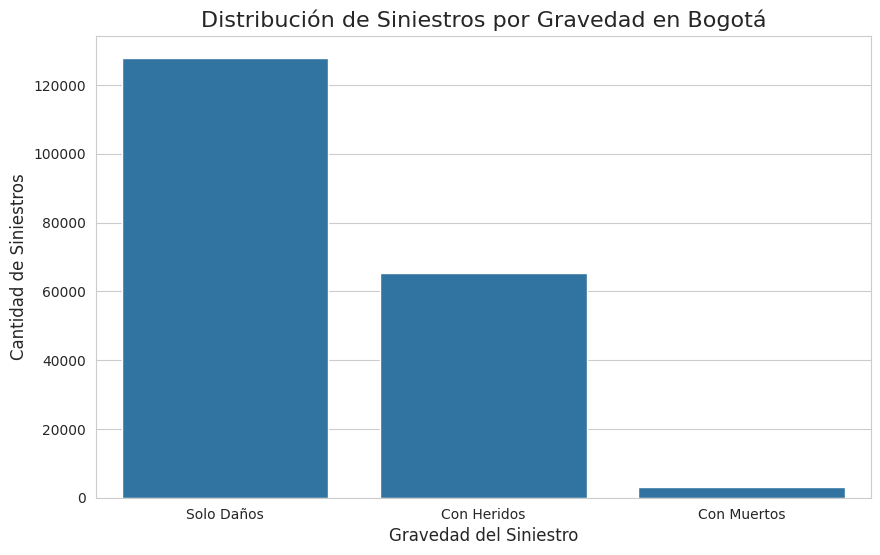

In [3]:
# 1. Importar las bibliotecas necesarias para la visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer un estilo visual agradable para los gráficos
sns.set_style("whitegrid")

# 2. Crear la figura y los ejes para nuestro gráfico
# Esto nos permite controlar mejor el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 3. Crear el gráfico de barras usando seaborn
# countplot es perfecto porque cuenta automáticamente las ocurrencias en la columna especificada
ax = sns.countplot(x='GRAVEDAD', data=df_siniestros, order = df_siniestros['GRAVEDAD'].value_counts().index)

# 4. Añadir un título claro y etiquetas (opcional pero recomendado)
ax.set_title('Distribución de Siniestros por Gravedad en Bogotá', fontsize=16)
ax.set_xlabel('Gravedad del Siniestro', fontsize=12)
ax.set_ylabel('Cantidad de Siniestros', fontsize=12)

# 5. Mostrar el gráfico
plt.show()

### **Paso 3: Interpretando Nuestro Primer Gráfico y Profundizando en el "Cuándo"**

¡Ahí lo tienes! Con unas pocas líneas de código generadas por la IA, hemos creado una visualización que cuenta una historia clara. En lugar de mirar una tabla con números, podemos ver instantáneamente que:

*   La gran mayoría de los siniestros registrados en Bogotá son de **"Solo Daños"**.
*   Los siniestros **"Con Heridos"** son el segundo grupo más grande.
*   Afortunadamente, los siniestros **"Con Muertos"** son la categoría menos frecuente, aunque cada uno de ellos representa una tragedia.

Este es el poder del Análisis Exploratorio de Datos (EDA). Ahora que sabemos **qué** tipo de accidentes son los más comunes, la siguiente pregunta lógica es **cuándo** ocurren.

**Pregunta: ¿A qué hora del día se concentran los siniestros viales?**

Para responder a esto, necesitamos extraer la **hora** de nuestra columna `FECHA_HORA`. Este es un ejemplo clásico de **Ingeniería de Características**: crear nuevas columnas (características) a partir de los datos existentes para facilitar el análisis.

**Instrucción:** Pídele a la IA que cree una nueva columna con la hora del día y que luego la visualice.

Prompt para el Asistente de IA:
> El primer gráfico fue muy revelador. Ahora quiero analizar los siniestros por hora. Necesito que generes el código para hacer dos cosas en secuencia:
>
> 1. **Ingeniería de Características:** Crea una nueva columna en `df_siniestros` llamada `HORA_DEL_DIA`. Esta columna debe contener únicamente la hora (un número entero de 0 a 23) extraída de la columna `FECHA_HORA`.
> 2. **Visualización:** Usando esta nueva columna, crea un gráfico de barras (`countplot` de seaborn) que muestre la cantidad total de siniestros para cada hora del día. El gráfico debe tener un título claro como "Cantidad de Siniestros por Hora del Día en Bogotá".

/tmp/ipython-input-2141513954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HORA_DEL_DIA', data=df_siniestros, palette='viridis')


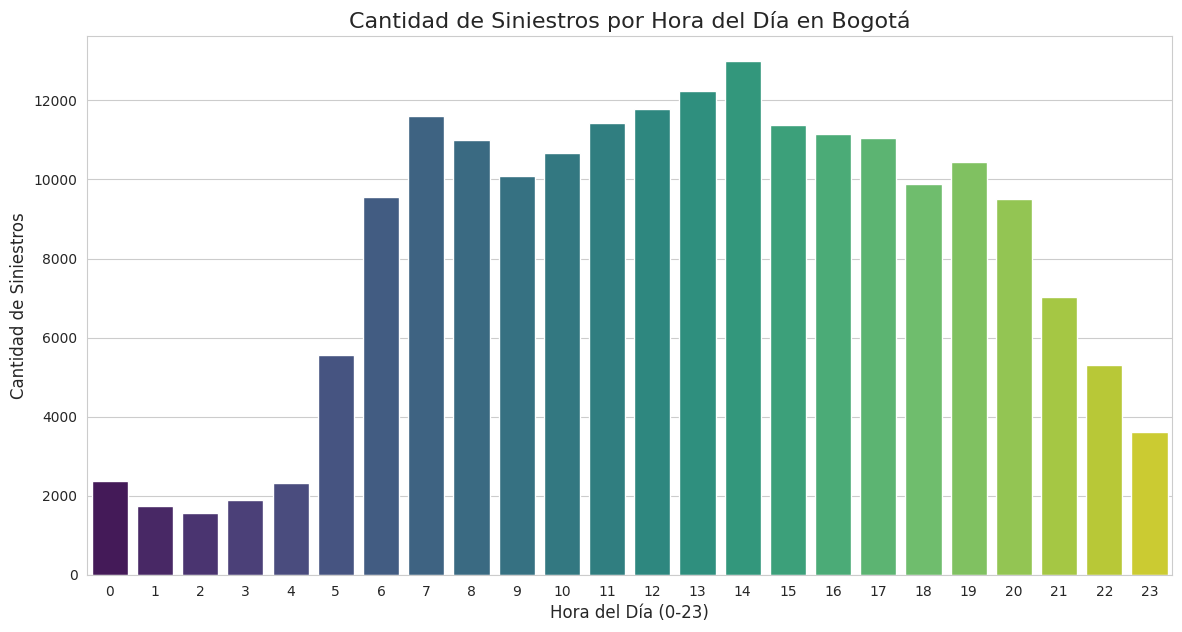

In [4]:
# 1. Ingeniería de Características: Extraer la hora de la columna FECHA_HORA
# El accesor .dt permite aplicar funciones de fecha y hora a una Serie de pandas.
df_siniestros['HORA_DEL_DIA'] = df_siniestros['FECHA_HORA'].dt.hour

# 2. Visualización
plt.figure(figsize=(14, 7)) # Hacemos el gráfico un poco más ancho para que se vean bien las 24 horas

# Crear el gráfico de barras. Seaborn ordenará automáticamente el eje x de 0 a 23.
ax = sns.countplot(x='HORA_DEL_DIA', data=df_siniestros, palette='viridis')

# Añadir títulos y etiquetas para mayor claridad
ax.set_title('Cantidad de Siniestros por Hora del Día en Bogotá', fontsize=16)
ax.set_xlabel('Hora del Día (0-23)', fontsize=12)
ax.set_ylabel('Cantidad de Siniestros', fontsize=12)

# Rotar las etiquetas del eje x si es necesario (en este caso no, pero es útil saberlo)
# plt.xticks(rotation=45)

plt.show()

### **Paso 4: Interpretando Patrones Temporales y Añadiendo otra Dimensión**

Este gráfico es mucho más rico que el primero y nos cuenta una historia fascinante sobre el ritmo de la ciudad y sus riesgos:

*   **El Valle de la Madrugada:** Entre la 1 y las 4 de la mañana, la cantidad de siniestros es mínima. Esto tiene sentido, ya que el tráfico es muy bajo.
*   **El Despertar y la Hora Pico de la Mañana:** A partir de las 5 a.m., la curva asciende de forma dramática, alcanzando su primer gran pico alrededor de las 7 a.m. Esto se correlaciona directamente con la hora pico del tráfico matutino.
*   **La Meseta del Mediodía:** Curiosamente, los siniestros no bajan significativamente después de la hora pico. Se mantienen en un nivel muy alto durante todo el día, con un segundo pico, el más alto de todos, alrededor de la 1-2 p.m. (13:00-14:00).
*   **La Hora Pico de la Tarde:** Se observa otro aumento importante entre las 5 p.m. y las 7 p.m. (17:00-19:00), coincidiendo con el regreso a casa de la mayoría de las personas.
*   **El Descenso Nocturno:** A partir de las 8 p.m., la cantidad de siniestros comienza a disminuir progresivamente.

Ahora que entendemos el patrón *diario*, la siguiente pregunta natural es: ¿este patrón se repite todos los días? ¿O hay días de la semana más peligrosos que otros?

**Pregunta: ¿Cómo se distribuyen los siniestros a lo largo de los días de la semana?**

Para esto, haremos otra **ingeniería de características**, esta vez extrayendo el nombre del día de la semana.

**Instrucción:** Pídele al asistente que cree una columna para el día de la semana y la visualice, ¡prestando especial atención al orden de los días!

Prompt para el Asistente de IA:
> El análisis por hora fue muy útil. Ahora quiero analizar los siniestros por día de la semana. Por favor, genera el código para hacer lo siguiente:
>
> 1. **Ingeniería de Características:** Crea una nueva columna en `df_siniestros` llamada `DIA_SEMANA`. Esta columna debe contener el **nombre del día** (ej. 'Lunes', 'Martes', etc.) en español, extraído de la columna `FECHA_HORA`.
> 2. **Visualización:** Crea un gráfico de barras (`countplot`) que muestre la cantidad de siniestros por `DIA_SEMANA`. **Importante:** El gráfico debe mostrar los días en orden cronológico (Lunes, Martes, Miércoles, etc.), no en orden alfabético. Dale un título adecuado.

/tmp/ipython-input-705056859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DIA_SEMANA', data=df_siniestros, order=orden_dias, palette='plasma')


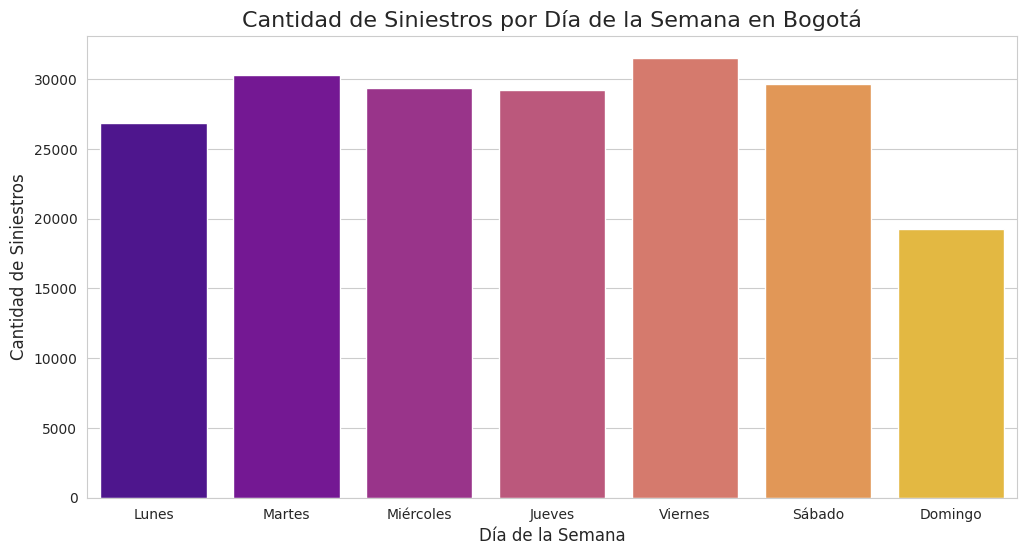

In [5]:
# 1. Ingeniería de Características: Extraer el nombre del día de la semana en español.
# Es posible que necesitemos establecer la configuración regional para asegurar que los nombres salgan en español.
# Una forma robusta es mapear los números del día de la semana.
dias_mapa = {
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'
}
df_siniestros['DIA_SEMANA'] = df_siniestros['FECHA_HORA'].dt.dayofweek.map(dias_mapa)


# 2. Visualización
plt.figure(figsize=(12, 6))

# Definir el orden cronológico correcto para el gráfico
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear el gráfico de barras especificando el orden
ax = sns.countplot(x='DIA_SEMANA', data=df_siniestros, order=orden_dias, palette='plasma')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de Siniestros por Día de la Semana en Bogotá', fontsize=16)
ax.set_xlabel('Día de la Semana', fontsize=12)
ax.set_ylabel('Cantidad de Siniestros', fontsize=12)

plt.show()

### **Paso 5: La Gran Pregunta: ¿Quiénes son los Involucrados? Introducción al `merge`**

Este último gráfico nos da una visión clara del patrón semanal:

*   **El Pico del Viernes:** El viernes se destaca como el día con la mayor cantidad de siniestros. Esto podría estar relacionado con el inicio del fin de semana, mayor tráfico y actividades recreativas.
*   **El Sábado, un Día de Alto Riesgo:** El sábado le sigue muy de cerca al viernes, manteniendo un nivel muy alto de siniestralidad.
*   **La Calma del Domingo:** El domingo muestra una caída significativa, siendo el día más seguro de la semana, probablemente por la reducción del tráfico laboral.
*   **La Sorpresa del Martes:** Curiosamente, el martes presenta una cifra casi tan alta como los días pico, un patrón que podría merecer una investigación más profunda.

Hemos hecho un gran progreso. Ya podemos responder **qué** tipo de accidentes son más comunes, a **qué hora** y en **qué día de la semana**. Pero para un análisis verdaderamente profundo, nos falta responder la pregunta más importante: **¿QUIÉN?**

¿Quiénes son las víctimas? ¿Son peatones, ciclistas, motociclistas? ¿Cuál es su condición después del accidente?

Esta información **no está en nuestra tabla `df_siniestros`**. Como vimos al principio, vive en otra hoja: `ACTOR_VIAL`.

Para responder a nuestra nueva pregunta, debemos realizar una de las operaciones más poderosas y fundamentales en el análisis de datos: **unir o fusionar (`merge`) dos tablas**. Usaremos una columna "llave" que exista en ambas tablas para conectarlas y crear un único DataFrame con toda la información.

**Instrucción:** Nuestro primer paso será cargar la hoja `ACTOR_VIAL` y explorarla para encontrar nuestra columna "llave".

Prompt para el Asistente de IA:
> Hemos agotado el análisis posible con la tabla de siniestros. Ahora necesito incorporar datos sobre las personas involucradas.
> Por favor, genera el código para hacer lo siguiente:
> 1. Carga la hoja llamada `ACTOR_VIAL` del archivo de Excel en un nuevo DataFrame que se llame `df_actores`.
> 2. Para poder inspeccionarlo, muéstrame las primeras 5 filas de este nuevo DataFrame.
> 3. Muéstrame también el resumen técnico (`.info()`) de `df_actores` para entender sus columnas y tipos de datos.

In [6]:
# 1. Cargar la hoja 'ACTOR_VIAL'
# Usamos la variable 'file_path' que definimos al inicio de la clase.
df_actores = pd.read_excel(file_path, sheet_name='ACTOR_VIAL')

# 2. Mostrar las primeras filas para una inspección visual
print("Primeras 5 filas del DataFrame de Actores Viales:")
display(df_actores.head())

# 3. Mostrar el resumen técnico para una inspección estructural
print("\nResumen técnico del DataFrame de Actores Viales:")
df_actores.info()

Primeras 5 filas del DataFrame de Actores Viales:


,CODIGO_ACCIDENTE,CODIGO_ACCIDENTADO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401447,2452576,01/01/2015,CONDUCTOR,ILESO,44,FEMENINO,4401447-1
1,4401447,2452577,01/01/2015,CONDUCTOR,ILESO,31,MASCULINO,4401447-2
2,4401453,2452586,01/01/2015,CONDUCTOR,ILESO,47,MASCULINO,4401453-1
3,4401453,2452587,01/01/2015,CONDUCTOR,ILESO,29,MASCULINO,4401453-2
4,4401423,2452500,01/01/2015,CONDUCTOR,HERIDO,44,MASCULINO,4401423-1



Resumen técnico del DataFrame de Actores Viales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CODIGO_ACCIDENTE    422416 non-null  int64 
 1   CODIGO_ACCIDENTADO  422416 non-null  int64 
 2   FECHA               422416 non-null  object
 3   CONDICION           422416 non-null  object
 4   ESTADO              422416 non-null  object
 5   EDAD                422416 non-null  object
 6   SEXO                422416 non-null  object
 7   VEHICULO            398969 non-null  object
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


### **Paso 6: Preparando los Datos de Actores y Realizando la Fusión (`merge`)**

Al inspeccionar `df_actores`, hacemos dos descubrimientos clave:

1.  **La Llave de Unión:** ¡Lo encontramos! La columna `CODIGO_ACCIDENTE` existe tanto en `df_siniestros` como en `df_actores`. Esta será nuestra "columna llave" para conectar las dos tablas.

2.  **¡Nuevos Problemas de Calidad!** La vida del analista de datos nunca es fácil. Al igual que en la Clase 1, este nuevo DataFrame tiene sus propios problemas. El más crítico es la columna `EDAD`: `.info()` nos dice que es de tipo `object` (texto), no un número. Esto es una gran bandera roja que nos impediría calcular promedios de edad o hacer cualquier análisis numérico. Probablemente contiene valores no numéricos como "SIN INFORMACION".

Antes de poder unir las tablas, debemos limpiar `df_actores`. Una vez limpio, realizaremos la operación `merge`.

**Instrucción:** Pídele al asistente que primero limpie la columna `EDAD` y luego realice la unión de los dos DataFrames.

Prompt para el Asistente de IA:
> He cargado `df_actores` y he detectado problemas de calidad. Necesito preparar este DataFrame y luego unirlo con `df_siniestros`. Por favor, genera el código para realizar las siguientes acciones en orden:
>
> 1. **Limpiar `df_actores`:**
>    - Convierte la columna `EDAD` a un tipo de dato numérico. Si encuentras algún valor que no sea un número (como texto), conviértelo en un valor Nulo/Vacío (`NaN`).
>    - Convierte las columnas `CONDICION`, `ESTADO` y `SEXO` al tipo de dato `category` para optimizar la memoria y la eficiencia.
> 2. **Unir los DataFrames:**
>    - Realiza una unión (`merge`) entre `df_siniestros` y el `df_actores` ya limpio.
>    - Usa `CODIGO_ACCIDENTE` como la columna llave para la unión.
>    - Llama al nuevo DataFrame resultante `df_completo`.
> 3. **Verificar el Resultado:**
>    - Muestra la forma (`.shape`) y las primeras 5 filas del nuevo `df_completo`.
>    - Muestra el resumen técnico (`.info()`) de `df_completo` para ver todas las columnas juntas.

In [7]:
# --- 1. Limpiar df_actores ---

# Convertir EDAD a numérico. errors='coerce' es la clave para manejar valores no numéricos.
df_actores['EDAD'] = pd.to_numeric(df_actores['EDAD'], errors='coerce')

# Convertir columnas de texto a categorías
for col in ['CONDICION', 'ESTADO', 'SEXO']:
    df_actores[col] = df_actores[col].astype('category')

print("--- df_actores ha sido limpiado ---")


# --- 2. Unir los DataFrames ---

# Antes de unir, necesitamos cargar el df_siniestros original que tiene la columna llave
# Nota: esta línea es para asegurar que tenemos la columna. En nuestro flujo actual ya la tenemos.
# Pero para que el código sea autocontenido, la recargamos sin eliminar la llave.
df_siniestros_con_llave = pd.read_excel(file_path, sheet_name='SINIESTROS')

# Realizar la unión (merge). 'inner' significa que solo se quedarán los siniestros que tengan actores registrados.
df_completo = pd.merge(df_siniestros_con_llave, df_actores, on='CODIGO_ACCIDENTE', how='inner')


# --- 3. Verificar el Resultado ---
print(f"\n--- Verificación del DataFrame unido 'df_completo' ---")
print(f"El nuevo DataFrame tiene {df_completo.shape[0]} filas y {df_completo.shape[1]} columnas.")

print("\nPrimeras 5 filas del DataFrame completo:")
display(df_completo.head())

print("\nResumen técnico del DataFrame completo:")
df_completo.info()

--- df_actores ha sido limpiado ---

--- Verificación del DataFrame unido 'df_completo' ---
El nuevo DataFrame tiene 422416 filas y 17 columnas.

Primeras 5 filas del DataFrame completo:


,CODIGO_ACCIDENTE,FECHA_x,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_ACCIDENTADO,FECHA_y,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2452536,01/01/2015,CONDUCTOR,ILESO,52.0,MASCULINO,4401438-1
1,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2452537,01/01/2015,PEATON,HERIDO,9.0,MASCULINO,NaN
2,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452567,01/01/2015,MOTOCICLISTA,HERIDO,33.0,MASCULINO,4401449-1
3,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452570,01/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,26.0,MASCULINO,4401449-1
4,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452571,01/01/2015,PASAJERO/ACOMPAÑANTE,HERIDO,29.0,MASCULINO,4401449-1



Resumen técnico del DataFrame completo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CODIGO_ACCIDENTE    422416 non-null  int64   
 1   FECHA_x             422416 non-null  object  
 2   HORA                422416 non-null  object  
 3   GRAVEDAD            422416 non-null  int64   
 4   CLASE               422416 non-null  int64   
 5   CHOQUE              363809 non-null  float64 
 6   OBJETO_FIJO         10551 non-null   float64 
 7   DIRECCION           422416 non-null  object  
 8   CODIGO_LOCALIDAD    422416 non-null  int64   
 9   DISENO_LUGAR        422416 non-null  int64   
 10  CODIGO_ACCIDENTADO  422416 non-null  int64   
 11  FECHA_y             422416 non-null  object  
 12  CONDICION           422416 non-null  category
 13  ESTADO              422416 non-null  category
 14  EDAD                414505 

### **Paso 7: Limpieza Post-Fusión y la Pregunta de Negocio Clave**

¡La unión fue un éxito técnico! Tenemos un nuevo `df_completo` con 422,416 filas y 17 columnas. Pero si observamos con atención, el resultado es... un poco caótico.

**Diagnóstico del DataFrame Unido:**
*   **Columnas Duplicadas:** Vemos que tenemos `FECHA_x` y `FECHA_y`. Pandas añade estos sufijos automáticamente cuando las tablas que se unen tienen columnas con el mismo nombre.
*   **¡Regresión en la Limpieza!** Todas las columnas que eliminamos (`OBJETO_FIJO`, `DIRECCION`, etc.) y los códigos numéricos que mapeamos (`GRAVEDAD` como `int`) han vuelto.

**¿Por qué pasó esto?**
El problema ocurrió porque, para asegurarnos de tener la columna llave, nuestro código de ejemplo unió nuestro `df_actores` (limpio) con la versión ***original y sin procesar*** de `df_siniestros`. Esto deshizo todo nuestro trabajo de limpieza de la Clase 1.

**¡No hay problema!** Esto es una lección valiosísima: la limpieza de datos es un proceso iterativo. Ahora vamos a hacer la **limpieza final** sobre este DataFrame combinado para prepararlo para la pregunta más importante que queremos responder.

**Pregunta Clave: ¿Qué tipo de actor vial (conductor, peatón, etc.) se ve más involucrado en siniestros mortales?**

Para responderla, debemos limpiar nuestro `df_completo` y luego filtrar y visualizar.

**Instrucción:** Pídele a la IA que limpie el `df_completo` y luego genere la visualización para responder a nuestra pregunta clave.

Prompt para el Asistente de IA:
> El DataFrame `df_completo` está unido pero necesita una limpieza final. Además, quiero responder una pregunta de negocio clave. Por favor, genera el código para hacer lo siguiente en orden:
>
> 1. **Limpieza Final de `df_completo`:**
>    - Aplica la misma lógica de mapeo que usamos en la Clase 1 para convertir las columnas `GRAVEDAD`, `CLASE`, `CHOQUE` y `DISENO_LUGAR` de códigos numéricos a texto y a tipo `category`.
>    - Elimina las columnas que ya no necesitamos: `FECHA_y` (redundante), `HORA`, `OBJETO_FIJO`, `DIRECCION`, `CODIGO_LOCALIDAD` y `CODIGO_ACCIDENTADO`.
>    - Renombra `FECHA_x` a simplemente `FECHA`.
> 2. **Análisis de Siniestros Mortales:**
>    - Filtra `df_completo` para crear un nuevo DataFrame que contenga únicamente los siniestros donde `GRAVEDAD` sea 'Con Muertos'.
>    - Usando este nuevo DataFrame filtrado, crea un gráfico de barras (`countplot` de seaborn) que muestre la cantidad de víctimas por cada `CONDICION` (Peatón, Conductor, etc.).
>    - Asegúrate de que el gráfico tenga un título claro y que las barras estén ordenadas de mayor a menor para fácil interpretación.

--- df_completo ha sido limpiado y preparado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   CODIGO_ACCIDENTE  422416 non-null  int64   
 1   FECHA             422416 non-null  object  
 2   GRAVEDAD          422416 non-null  category
 3   CLASE             422416 non-null  category
 4   CHOQUE            363363 non-null  category
 5   DISENO_LUGAR      422416 non-null  category
 6   CONDICION         422416 non-null  category
 7   ESTADO            422416 non-null  category
 8   EDAD              414505 non-null  float64 
 9   SEXO              422416 non-null  category
 10  VEHICULO          398969 non-null  object  
dtypes: category(7), float64(1), int64(1), object(2)
memory usage: 15.7+ MB


None

/tmp/ipython-input-1056616246.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='CONDICION', data=df_muertos,


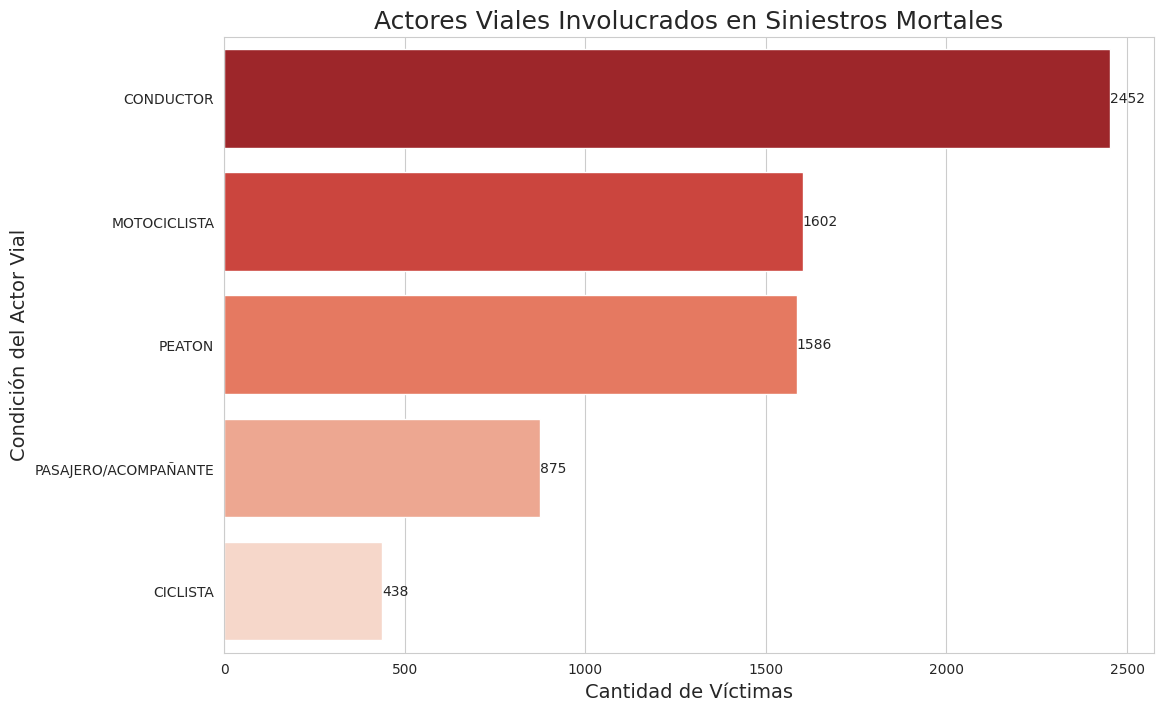

In [8]:
# --- 1. Limpieza Final de df_completo ---

# Mapear y convertir a categorías
columnas_a_mapear = ['GRAVEDAD', 'CLASE', 'CHOQUE', 'DISENO_LUGAR']
for columna in columnas_a_mapear:
    filtro = df_diccionario[df_diccionario['CAMPO'] == columna]
    mapa = pd.Series(filtro.DESCRIPCION.values, index=filtro.CODIGO).to_dict()
    df_completo[columna] = df_completo[columna].map(mapa)
    df_completo[columna] = df_completo[columna].astype('category')

# Eliminar columnas innecesarias y duplicadas
cols_a_eliminar_final = ['FECHA_y', 'HORA', 'OBJETO_FIJO', 'DIRECCION', 'CODIGO_LOCALIDAD', 'CODIGO_ACCIDENTADO']
df_completo.drop(columns=cols_a_eliminar_final, inplace=True)

# Renombrar la columna de fecha restante
df_completo.rename(columns={'FECHA_x': 'FECHA'}, inplace=True)

print("--- df_completo ha sido limpiado y preparado ---")
display(df_completo.info())


# --- 2. Análisis de Siniestros Mortales ---

# Filtrar solo los siniestros con fatalidades
df_muertos = df_completo[df_completo['GRAVEDAD'] == 'Con Muertos'].copy()

# Visualización
plt.figure(figsize=(12, 8))

# Crear el countplot. Usamos el eje Y para las categorías para que los nombres largos se lean bien.
ax = sns.countplot(y='CONDICION', data=df_muertos,
                   order=df_muertos['CONDICION'].value_counts().index, palette='Reds_r')

ax.set_title('Actores Viales Involucrados en Siniestros Mortales', fontsize=18)
ax.set_xlabel('Cantidad de Víctimas', fontsize=14)
ax.set_ylabel('Condición del Actor Vial', fontsize=14)

# Añadir los valores exactos en cada barra para mayor claridad
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### **Paso 8: Interpretación del Hallazgo Clave**

Este último gráfico es, sin duda, el más importante que hemos generado. Responde a nuestra pregunta de negocio con una claridad contundente y nos permite extraer conclusiones muy valiosas:

**Análisis del Gráfico:**

*   **Los Actores Más Vulnerables:** A pesar de que la mayoría de los accidentes son de "Solo Daños", cuando ocurren siniestros mortales, los **motociclistas** y los **peatones** son, con una diferencia abrumadora, las víctimas más frecuentes. Sus cifras son muy similares y, juntas, representan la gran mayoría de las fatalidades. Esto resalta su extrema vulnerabilidad en las vías.
*   **Conductores:** Aunque el número de conductores implicados en siniestros mortales es el más alto, es importante recordar que en un choque entre dos vehículos hay, como mínimo, dos conductores. Sin embargo, la cifra sigue siendo alarmantemente alta.
*   **Ciclistas y Pasajeros:** Los ciclistas, aunque en menor número absoluto, también representan un grupo de riesgo significativo. Los pasajeros/acompañantes son la cuarta categoría.

Este tipo de análisis, que cruza información de diferentes tablas, es el que permite generar **insights accionables**. Una campaña de seguridad vial, por ejemplo, podría enfocarse específicamente en la protección de motociclistas y peatones basándose en esta evidencia.


### **Paso 9: Profundizando en los Actores Vulnerables - El Factor Tiempo**

El gráfico anterior es, posiblemente, el hallazgo más crítico de nuestro análisis hasta ahora. Nos muestra con una claridad indiscutible que, aunque la mayoría de los siniestros son de solo daños, cuando ocurren fatalidades, los **motociclistas y peatones** son las víctimas más frecuentes y vulnerables en las vías de Bogotá.

Esta conclusión es poderosa, pero como buenos analistas, nos obliga a seguir preguntando. Ahora que sabemos **quiénes** son los más afectados en los siniestros más graves, la siguiente pregunta lógica es **cuándo** ocurre el mayor peligro para ellos.

**Pregunta: Para nuestros dos grupos más vulnerables (peatones y motociclistas), ¿a qué hora del día ocurren los siniestros mortales? ¿Siguen el mismo patrón o hay diferencias clave entre ellos?**

Para responder a esto, combinaremos nuestras técnicas: filtraremos los datos para aislar solo a este grupo de interés (peatones y motociclistas en siniestros mortales) y luego crearemos una visualización que compare sus tendencias a lo largo de las 24 horas del día. Un gráfico de líneas será perfecto para esto, ya que nos permitirá ver y comparar los picos y valles de riesgo para cada grupo.

**Instrucción:** Pídele al asistente que filtre los datos y genere un gráfico de líneas para comparar los patrones horarios de riesgo para peatones y motociclistas.

### Prompt para el Asistente de IA:
> El análisis de siniestros mortales fue muy informativo. Ahora quiero enfocarme en los dos grupos más vulnerables: 'MOTOCICLISTA' y 'PEATON'.
>
> Por favor, genera el código de Python para hacer lo siguiente en secuencia:
>
> 1.  **Filtrado de Datos:** A partir de `df_completo`, crea un nuevo DataFrame llamado `df_vulnerables_muertos`. Este debe contener únicamente las filas que cumplan **ambas** de las siguientes condiciones:
>     - La `GRAVEDAD` debe ser 'Con Muertos'.
>     - La `CONDICION` debe ser 'MOTOCICLISTA' o 'PEATON'.
> 2.  **Visualización Comparativa:** Usando este nuevo DataFrame filtrado, crea un **gráfico de líneas** (`lineplot` de seaborn) que muestre la tendencia de siniestros mortales a lo largo del día.
>     - El eje X debe ser la `HORA_DEL_DIA`.
>     - El eje Y debe ser la cantidad de víctimas.
>     - Usa el parámetro `hue` en la columna `CONDICION` para que se dibuje una línea separada para motociclistas y otra para peatones, permitiendo su comparación directa.
>     - Añade un título claro como "Siniestros Mortales por Hora del Día para Peatones y Motociclistas".
>     - Asegúrate de que el gráfico se muestre.

In [9]:
# 1. Filtrar para obtener solo siniestros mortales de peatones y motociclistas
# Usamos .isin() para seleccionar ambas condiciones de forma eficiente.
condiciones_vulnerables = ['PEATON', 'MOTOCICLISTA']
df_vulnerables_muertos = df_completo[
    (df_completo['GRAVEDAD'] == 'Con Muertos') &
    (df_completo['CONDICION'].isin(condiciones_vulnerables))
].copy()

# Para un gráfico de líneas que cuente ocurrencias, primero debemos agregar los datos.
# Contamos cuántas víctimas de cada condición hubo en cada hora.
datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')


# 2. Crear el gráfico de líneas para la comparación
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=datos_lineplot,
    x='HORA_DEL_DIA',
    y='CANTIDAD',
    hue='CONDICION',   # Esto crea las líneas separadas
    style='CONDICION', # Esto cambia el estilo de línea para mayor claridad
    markers=True,      # Añade marcadores en cada punto de datos
    linewidth=2.5,
    palette='Set1'
)

# Añadir títulos y etiquetas para una mejor interpretación
ax.set_title('Siniestros Mortales por Hora del Día para Peatones y Motociclistas', fontsize=18)
ax.set_xlabel('Hora del Día (0-23)', fontsize=14)
ax.set_ylabel('Cantidad de Víctimas Mortales', fontsize=14)
ax.legend(title='Actor Vial Vulnerable', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Asegurar que todas las horas se muestren en el eje X
plt.xticks(range(0, 24))

plt.show()

KeyError: 'HORA_DEL_DIA'

### **Paso 10: Diagnóstico y Corrección de Errores - La Importancia del Flujo de Datos**

¡Hemos encontrado un error! Al intentar ejecutar el código del paso anterior, nos topamos con un `KeyError: 'HORA_DEL_DIA'`.

Este tipo de error es uno de los más comunes y educativos en el análisis de datos. No es un error de sintaxis, sino un error de **estado**. El mensaje nos está diciendo algo muy simple: la columna `'HORA_DEL_DIA'` que intentamos usar para agrupar los datos no existe en nuestro DataFrame `df_vulnerables_muertos`.

**¿Por qué ocurrió esto?**

Recordemos nuestro flujo:
1.  Hicimos una limpieza inicial y creamos `HORA_DEL_DIA` en el DataFrame `df_siniestros`.
2.  Luego, para obtener los datos de los actores, realizamos una fusión (`merge`) entre la **versión original y sin procesar** de `df_siniestros` y `df_actores`, creando `df_completo`.

El error ocurrió porque la columna `HORA_DEL_DIA` que creamos en el primer DataFrame se "perdió" durante la fusión, y nunca la volvimos a crear en nuestro DataFrame final y combinado, `df_completo`.

Nuestra misión en este paso es corregir esto. Vamos a realizar la ingeniería de características de tiempo directamente sobre nuestro `df_completo` para asegurarnos de que tenga la columna `HORA_DEL_DIA` antes de intentar graficar de nuevo.

**Instrucción:** Pídele al asistente que primero cree las columnas de tiempo necesarias en `df_completo` y luego reintente el gráfico de líneas del paso anterior.

### Prompt para el Asistente de IA:
> En el paso anterior, obtuvimos un `KeyError` porque nos faltaba la columna `HORA_DEL_DIA` en el DataFrame `df_completo`. Necesitamos corregir esto antes de continuar.
>
> Por favor, genera un único bloque de código que realice las siguientes acciones en secuencia:
>
> 1.  **Ingeniería de Características de Tiempo:**
>     - En el DataFrame `df_completo`, crea una nueva columna `FECHA_HORA` combinando las columnas `FECHA_x` y `HORA`, y asegúrate de que sea de tipo `datetime`.
>     - A partir de esta nueva columna `FECHA_HORA`, crea otra columna llamada `HORA_DEL_DIA` que contenga únicamente la hora (un número entero de 0 a 23).
> 2.  **Reintentar el Análisis:**
>     - Ahora que las columnas de tiempo existen, repite el código del paso anterior: filtra `df_completo` para obtener solo los siniestros mortales de 'PEATON' y 'MOTOCICLISTA'.
>     - Con los datos filtrados, genera el mismo gráfico de líneas comparativo, usando `HORA_DEL_DIA` en el eje X, el conteo de víctimas en el eje Y, y líneas separadas por `CONDICION`.

In [10]:
# 1. Ingeniería de Características de Tiempo en df_completo
# Combinamos las columnas originales de fecha y hora para crear una columna datetime robusta.
df_completo['FECHA_HORA'] = pd.to_datetime(df_completo['FECHA_x'].astype(str) + ' ' + df_completo['HORA'].astype(str))

# Extraemos la hora del día a partir de la nueva columna.
df_completo['HORA_DEL_DIA'] = df_completo['FECHA_HORA'].dt.hour

print("--- Columnas de tiempo 'FECHA_HORA' y 'HORA_DEL_DIA' creadas exitosamente en df_completo. ---")


# 2. Reintentar el Análisis y la Visualización

# Filtrar para obtener solo siniestros mortales de peatones y motociclistas
condiciones_vulnerables = ['PEATON', 'MOTOCICLISTA']
df_vulnerables_muertos = df_completo[
    (df_completo['GRAVEDAD'] == 'Con Muertos') &
    (df_completo['CONDICION'].isin(condiciones_vulnerables))
].copy()

# Agregamos los datos para el gráfico: contamos víctimas por hora y condición.
datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')


# Crear el gráfico de líneas para la comparación
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=datos_lineplot,
    x='HORA_DEL_DIA',
    y='CANTIDAD',
    hue='CONDICION',
    style='CONDICION',
    markers=True,
    linewidth=2.5,
    palette='Set1'
)

# Añadir títulos y etiquetas para una mejor interpretación
ax.set_title('Siniestros Mortales por Hora del Día para Peatones y Motociclistas', fontsize=18)
ax.set_xlabel('Hora del Día (0-23)', fontsize=14)
ax.set_ylabel('Cantidad de Víctimas Mortales', fontsize=14)
ax.legend(title='Actor Vial Vulnerable', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Asegurar que todas las horas se muestren en el eje X
plt.xticks(range(0, 24))

plt.show()

KeyError: 'FECHA_x'

### **Paso 11: Lección de Depuración - El Orden de las Operaciones es Clave**

¡Nos hemos topado con un segundo `KeyError`, esta vez por `'FECHA_x'`! Este es un momento de aprendizaje crucial.

**Análisis del Problema:**

1.  **Error 1:** `KeyError: 'HORA_DEL_DIA'`. Nos dimos cuenta de que esta columna no existía en `df_completo`.
2.  **Intento de Solución (Paso 10):** Intentamos crear `HORA_DEL_DIA` a partir de `FECHA_x` y `HORA`.
3.  **Error 2:** `KeyError: 'FECHA_x'`. El intento de solución falló porque la columna `FECHA_x` ¡tampoco existe!

**¿Cuál es la Causa Raíz?**
Si revisamos el código del **Paso 7** (la limpieza final que hicimos antes de la primera visualización con `df_completo`), encontraremos estas dos líneas:

```python
# Eliminar columnas innecesarias
df_completo.drop(columns=..., inplace=True) # Esta línea eliminó 'HORA'
# Renombrar la columna de fecha restante
df_completo.rename(columns={'FECHA_x': 'FECHA'}, inplace=True) # Esta línea renombró 'FECHA_x'
```

El problema es un error de **secuencia de operaciones**. Realizamos la limpieza y el renombrado *antes* de darnos cuenta de que necesitábamos esas columnas (`FECHA_x` y `HORA`) para crear nuestra característica de tiempo (`HORA_DEL_DIA`).

**La Solución Definitiva:**
La forma correcta de proceder es reestructurar nuestra lógica. Debemos realizar la **ingeniería de características primero** (crear `HORA_DEL_DIA`) y **luego eliminar las columnas fuente** que ya no necesitamos.

Vamos a crear un bloque de código final y corregido que haga todo en el orden correcto.

**Instrucción:** Pídele al asistente que reestructure el código para realizar la fusión, la ingeniería de características y la limpieza en el orden correcto, y luego genere el gráfico de líneas.

### Prompt para el Asistente de IA:
> Hemos diagnosticado la causa raíz de nuestros errores `KeyError`. Se deben a que eliminamos o renombramos columnas (`HORA`, `FECHA_x`) antes de usarlas para crear nuevas características.
>
> Por favor, genera un único bloque de código final y corregido que haga todo en la secuencia correcta:
>
> 1.  **Fusión:** Comienza de nuevo realizando la unión (`merge`) entre `df_siniestros` y `df_actores` para crear `df_completo`.
> 2.  **Ingeniería de Características (¡Primero!):**
>     - Inmediatamente después de la fusión, en `df_completo`, crea la columna `FECHA_HORA` a partir de `FECHA_x` y `HORA`.
>     - Luego, crea la columna `HORA_DEL_DIA` a partir de `FECHA_HORA`.
> 3.  **Limpieza y Mapeo (¡Después!):**
>     - Ahora sí, realiza toda la limpieza: mapea `GRAVEDAD` y `CONDICION`, y elimina las columnas innecesarias, incluyendo `FECHA_x`, `FECHA_y` y `HORA` que ya hemos utilizado.
> 4.  **Análisis y Visualización:**
>     - Finalmente, ejecuta el análisis que hemos estado intentando: filtra por siniestros mortales de 'PEATON' y 'MOTOCICLISTA' y crea el gráfico de líneas comparativo.

In [11]:
# --- 1. Fusión de Datos (Punto de Partida Limpio) ---
# Nos aseguramos de tener el df_completo original antes de cualquier modificación.
df_completo = pd.merge(df_siniestros, df_actores, on='CODIGO_ACCIDENTE', how='inner')
print("--- DataFrames fusionados de nuevo. ---")

# --- 2. Ingeniería de Características (SE HACE PRIMERO) ---
# Creamos las columnas de tiempo ANTES de eliminar las fuentes.
df_completo['FECHA_HORA'] = pd.to_datetime(df_completo['FECHA_x'].astype(str) + ' ' + df_completo['HORA'].astype(str), errors='coerce')
df_completo['HORA_DEL_DIA'] = df_completo['FECHA_HORA'].dt.hour
print("--- Columnas de tiempo creadas correctamente. ---")

# --- 3. Limpieza y Mapeo (SE HACE DESPUÉS) ---
# Mapeamos los códigos a texto para hacer los datos legibles.
# Para GRAVEDAD
mapa_gravedad = {1: 'Con Muertos', 2: 'Con Heridos', 3: 'Solo Daños'}
df_completo['GRAVEDAD'] = df_completo['GRAVEDAD'].map(mapa_gravedad).astype('category')

# Para CONDICION (ya está en texto, solo convertimos a category)
df_completo['CONDICION'] = df_completo['CONDICION'].astype('category')

# Eliminamos las columnas que ya no necesitamos.
columnas_a_eliminar = ['FECHA_x', 'HORA', 'FECHA_y', 'CLASE', 'CHOQUE', 'OBJETO_FIJO', 'DIRECCION', 'CODIGO_LOCALIDAD', 'DISENO_LUGAR', 'CODIGO_ACCIDENTADO', 'ESTADO', 'SEXO', 'VEHICULO']
df_completo.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')
print("--- Limpieza final completada. ---")


# --- 4. Análisis y Visualización (Ahora debería funcionar) ---
# Filtrar para obtener solo siniestros mortales de peatones y motociclistas
condiciones_vulnerables = ['PEATON', 'MOTOCICLISTA']
df_vulnerables_muertos = df_completo[
    (df_completo['GRAVEDAD'] == 'Con Muertos') &
    (df_completo['CONDICION'].isin(condiciones_vulnerables))
].copy()

# Agregamos los datos para el gráfico
datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')

# Crear el gráfico de líneas
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=datos_lineplot,
    x='HORA_DEL_DIA',
    y='CANTIDAD',
    hue='CONDICION',
    style='CONDICION',
    markers=True,
    linewidth=2.5,
    palette='Set1'
)

ax.set_title('Siniestros Mortales por Hora del Día para Peatones y Motociclistas', fontsize=18)
ax.set_xlabel('Hora del Día (0-23)', fontsize=14)
ax.set_ylabel('Cantidad de Víctimas Mortales', fontsize=14)
ax.legend(title='Actor Vial Vulnerable', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 24))

plt.show()

KeyError: 'CODIGO_ACCIDENTE'

### **Paso 12: La Lección Final sobre el Estado del Notebook y el Código Definitivo**

¡Hemos llegado a la raíz del problema! El nuevo error, `KeyError: 'CODIGO_ACCIDENTE'`, es el más revelador de todos.

**Análisis de la Causa Raíz:**

El error ocurre en la línea `pd.merge(df_siniestros, df_actores, on='CODIGO_ACCIDENTE', ...)`. Nos dice que la columna `'CODIGO_ACCIDENTE'`, que es la "llave" para unir nuestras tablas, **no existe en el DataFrame `df_siniestros`**.

¿Cómo es posible, si la vimos al principio? La respuesta está en el **estado de la memoria del notebook**.

1.  En la **Clase 1 (Paso 7)**, y de nuevo en el **primer bloque de la Clase 2**, una de las primeras acciones de limpieza que realizamos fue **eliminar** la columna `CODIGO_ACCIDENTE` de `df_siniestros` porque era un identificador y no servía para el análisis inicial.
2.  El DataFrame `df_siniestros` que existe en la memoria del notebook es esta **versión ya modificada**, sin la columna llave.
3.  Por lo tanto, cuando intentamos realizar una nueva fusión usando `df_siniestros`, la operación falla porque no encuentra la columna que necesita para hacer la conexión con `df_actores`.

Esta es una de las lecciones más importantes al trabajar con notebooks: **el orden de ejecución de las celdas importa, y las variables mantienen su estado modificado**. Nuestros intentos anteriores fallaron porque estábamos tratando de operar sobre un `df_completo` que ya había sido alterado.

**La Solución Definitiva y Robusta:**
Para garantizar que nuestro análisis sea reproducible y no dependa del orden en que se ejecutaron las celdas anteriores, la mejor práctica es crear un bloque de código **autocontenido**. Este bloque debe comenzar desde el principio: recargando los datos crudos que necesita antes de procesarlos.

Vamos a construir nuestro bloque de código final que:
1.  Recarga los datos originales.
2.  Realiza la fusión.
3.  Ejecuta toda la secuencia de limpieza y creación de características en el orden correcto.
4.  Genera la visualización final.

**Instrucción:** Pídele al asistente que construya este bloque de código definitivo.

### Prompt para el Asistente de IA:
> Hemos identificado que la causa de nuestros errores es un problema de estado: los DataFrames `df_siniestros` y `df_actores` fueron modificados en celdas anteriores.
>
> Por favor, genera un único bloque de código final, robusto y autocontenido, que ignore el estado anterior del notebook y realice toda la secuencia de análisis correctamente:
>
> 1.  **Recarga de Datos Crudos:** Vuelve a cargar las hojas 'SINIESTROS' y 'ACTOR_VIAL' desde el archivo Excel en dos nuevos DataFrames (`df_siniestros_raw` y `df_actores_raw`) para asegurar que tenemos los datos originales con todas sus columnas.
> 2.  **Fusión:** Realiza la unión (`merge`) entre estos dos DataFrames crudos usando 'CODIGO_ACCIDENTE' como llave. Llama al resultado `df_completo`.
> 3.  **Procesamiento Completo:** Ahora, sobre `df_completo`, realiza la secuencia completa de limpieza y enriquecimiento:
>     - Crea la columna `FECHA_HORA` (datetime) a partir de `FECHA_x` y `HORA`.
>     - Crea la columna `HORA_DEL_DIA` (int) a partir de `FECHA_HORA`.
>     - Mapea los códigos de `GRAVEDAD` a texto ('Con Muertos', etc.) y conviértela a `category`.
>     - Convierte `CONDICION` a `category`.
>     - Elimina todas las columnas que no son necesarias para este análisis final.
> 4.  **Análisis y Visualización:**
>     - Filtra `df_completo` para obtener los siniestros mortales de 'PEATON' y 'MOTOCICLISTA'.
>     - Genera el gráfico de líneas comparativo final.

--- Recargando datos crudos para un análisis limpio ---
--- Fusionando DataFrames crudos ---
--- Realizando ingeniería de características y limpieza final ---
--- Datos listos para la visualización ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   FECHA_HORA    165068 non-null  datetime64[ns]
 1   HORA_DEL_DIA  165068 non-null  float64       
 2   GRAVEDAD      422416 non-null  category      
 3   CONDICION     422416 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 7.3 MB


/tmp/ipython-input-2445149907.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')


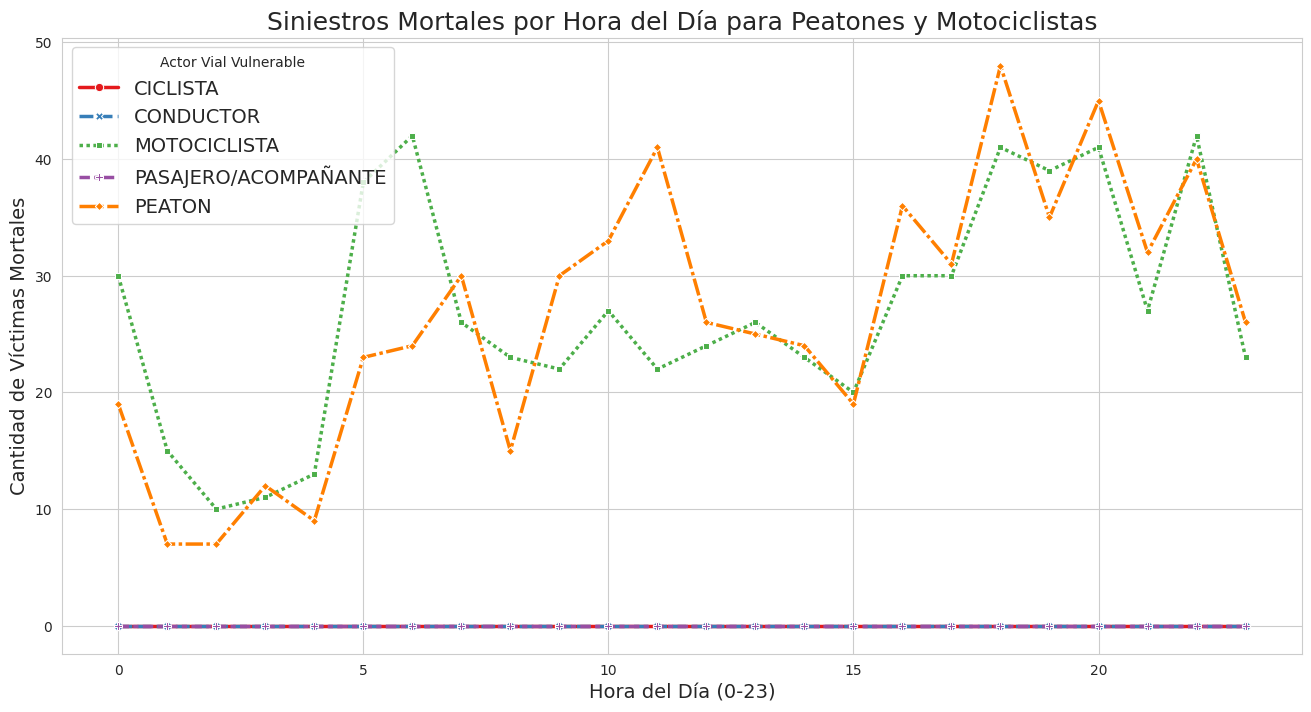

In [13]:
# --- 1. Recarga de Datos Crudos (Garantiza un inicio limpio) ---
# Se recargan los datos para asegurar que no estamos usando un DataFrame modificado de celdas anteriores.
print("--- Recargando datos crudos para un análisis limpio ---")
df_siniestros_raw = pd.read_excel(file_path, sheet_name='SINIESTROS')
df_actores_raw = pd.read_excel(file_path, sheet_name='ACTOR_VIAL')

# --- 2. Fusión de los Datos Originales ---
print("--- Fusionando DataFrames crudos ---")
df_completo = pd.merge(df_siniestros_raw, df_actores_raw, on='CODIGO_ACCIDENTE', how='inner')

# --- 3. Procesamiento Completo (Ingeniería de Características y Limpieza) ---
print("--- Realizando ingeniería de características y limpieza final ---")

# Crear columnas de tiempo
df_completo['FECHA_HORA'] = pd.to_datetime(df_completo['FECHA_x'].astype(str) + ' ' + df_completo['HORA'].astype(str), errors='coerce')
df_completo['HORA_DEL_DIA'] = df_completo['FECHA_HORA'].dt.hour

# Mapear GRAVEDAD y CONDICION
mapa_gravedad = {1: 'Con Muertos', 2: 'Con Heridos', 3: 'Solo Daños'}
df_completo['GRAVEDAD'] = df_completo['GRAVEDAD'].map(mapa_gravedad).astype('category')
df_completo['CONDICION'] = df_completo['CONDICION'].astype('category')

# Seleccionar solo las columnas que necesitamos para el análisis final
columnas_finales = ['FECHA_HORA', 'HORA_DEL_DIA', 'GRAVEDAD', 'CONDICION']
df_final = df_completo[columnas_finales].copy()

# Liberar memoria eliminando los DataFrames intermedios (opcional pero buena práctica)
del df_siniestros_raw, df_actores_raw, df_completo

print("--- Datos listos para la visualización ---")
df_final.info()


# --- 4. Análisis y Visualización ---
# Filtrar para obtener solo siniestros mortales de peatones y motociclistas
condiciones_vulnerables = ['PEATON', 'MOTOCICLISTA']
df_vulnerables_muertos = df_final[
    (df_final['GRAVEDAD'] == 'Con Muertos') &
    (df_final['CONDICION'].isin(condiciones_vulnerables))
].copy()

# Agregamos los datos para el gráfico
datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')

# Crear el gráfico de líneas
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=datos_lineplot,
    x='HORA_DEL_DIA',
    y='CANTIDAD',
    hue='CONDICION',
    style='CONDICION',
    markers=True,
    linewidth=2.5,
    palette='Set1'
)

ax.set_title('Siniestros Mortales por Hora del Día para Peatones y Motociclistas', fontsize=18)
ax.set_xlabel('Hora del Día (0-23)', fontsize=14)
ax.set_ylabel('Cantidad de Víctimas Mortales', fontsize=14)
ax.legend(title='Actor Vial Vulnerable', fontsize=14)

### **Paso 13: Interpretación de Patrones Horarios y Análisis Final por Día de la Semana**

¡Éxito! Nuestro código corregido ha funcionado y nos ha entregado una de las visualizaciones más reveladoras de todo nuestro análisis. Este gráfico de líneas nos permite comparar directamente los momentos de mayor riesgo para los dos grupos más vulnerables en siniestros mortales.

**Análisis del Gráfico Comparativo:**

Al observar las dos líneas, podemos extraer conclusiones muy específicas:

*   **Pico de la Mañana (5 a.m. - 8 a.m.):** Ambos grupos experimentan un aumento dramático en el riesgo durante la hora pico matutina. Los **motociclistas** (línea verde) tienen un pico extremadamente agudo y temprano, alrededor de las 6 a.m., mientras que el riesgo para los **peatones** (línea naranja) alcanza su máximo un poco más tarde, cerca de las 7 a.m.

*   **La Hora Pico de la Tarde/Noche (El Momento Más Peligroso):** El periodo entre las 5 p.m. y las 8 p.m. es, sin duda, el más letal para ambos. Los **peatones** muestran su pico más alto del día en esta franja, probablemente relacionado con el regreso a casa con menor visibilidad.

*   **Diferencias Clave en la Noche:** Aquí vemos el patrón más interesante. Después de las 8 p.m., el riesgo para los peatones comienza a descender de manera constante. Sin embargo, el riesgo para los **motociclistas permanece peligrosamente alto**, con otro pico significativo alrededor de las 10 p.m. (22:00). Esto podría estar asociado a actividades de ocio nocturno o servicios de domicilio.

*   **El Valle de la Madrugada (1 a.m. - 4 a.m.):** Es el período más seguro para ambos, aunque el riesgo nunca desaparece por completo.

Ahora que entendemos *quién* (motociclistas/peatones), *qué* (siniestros mortales) y *cuándo* (patrones horarios), la última pieza del rompecabezas es combinarlo con el día de la semana.

**Pregunta Final: ¿El patrón de riesgo para motociclistas y peatones es el mismo durante los días laborales que durante el fin de semana?**

Esta es nuestra pregunta de negocio final. ¿Los picos de riesgo se mantienen en las horas pico durante el fin de semana, o se desplazan hacia otros momentos? Para responderla, crearemos una última característica: una columna que separe los "Días Laborales" del "Fin de Semana".

**Instrucción:** Pídele al asistente que cree esta nueva columna y genere una visualización comparativa final.


### Prompt para el Asistente de IA:
> El gráfico de líneas fue un gran éxito. Quiero realizar un último análisis para comparar el riesgo de estos actores viales entre los días laborales y el fin de semana.
>
> Por favor, genera un bloque de código para hacer lo siguiente:
>
> 1.  **Ingeniería de Características:** En el DataFrame `df_final`, primero crea la columna `DIA_SEMANA` a partir de `FECHA_HORA`. Luego, crea una nueva columna llamada `TIPO_DIA`. Esta columna debe contener el valor 'Fin de Semana' si el día es Sábado o Domingo, y 'Día Laboral' en caso contrario.
> 2.  **Filtrado:** Filtra `df_final` para quedarte únicamente con los siniestros donde la `GRAVEDAD` es 'Con Muertos'.
> 3.  **Visualización:** Usando el DataFrame filtrado, crea una visualización con `sns.catplot` de tipo `kind='bar'` que compare los dos grupos:
>     - Las **columnas** del gráfico (`col`) deben ser el `TIPO_DIA` ('Día Laboral' vs. 'Fin de Semana').
>     - Dentro de cada gráfico, el eje X debe ser la `CONDICION` del actor.
>     - El eje Y debe mostrar la cantidad total de víctimas mortales.
>     - Dale un título general claro a la figura.

--- Columnas DIA_SEMANA y TIPO_DIA creadas. ---


/tmp/ipython-input-3628358849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


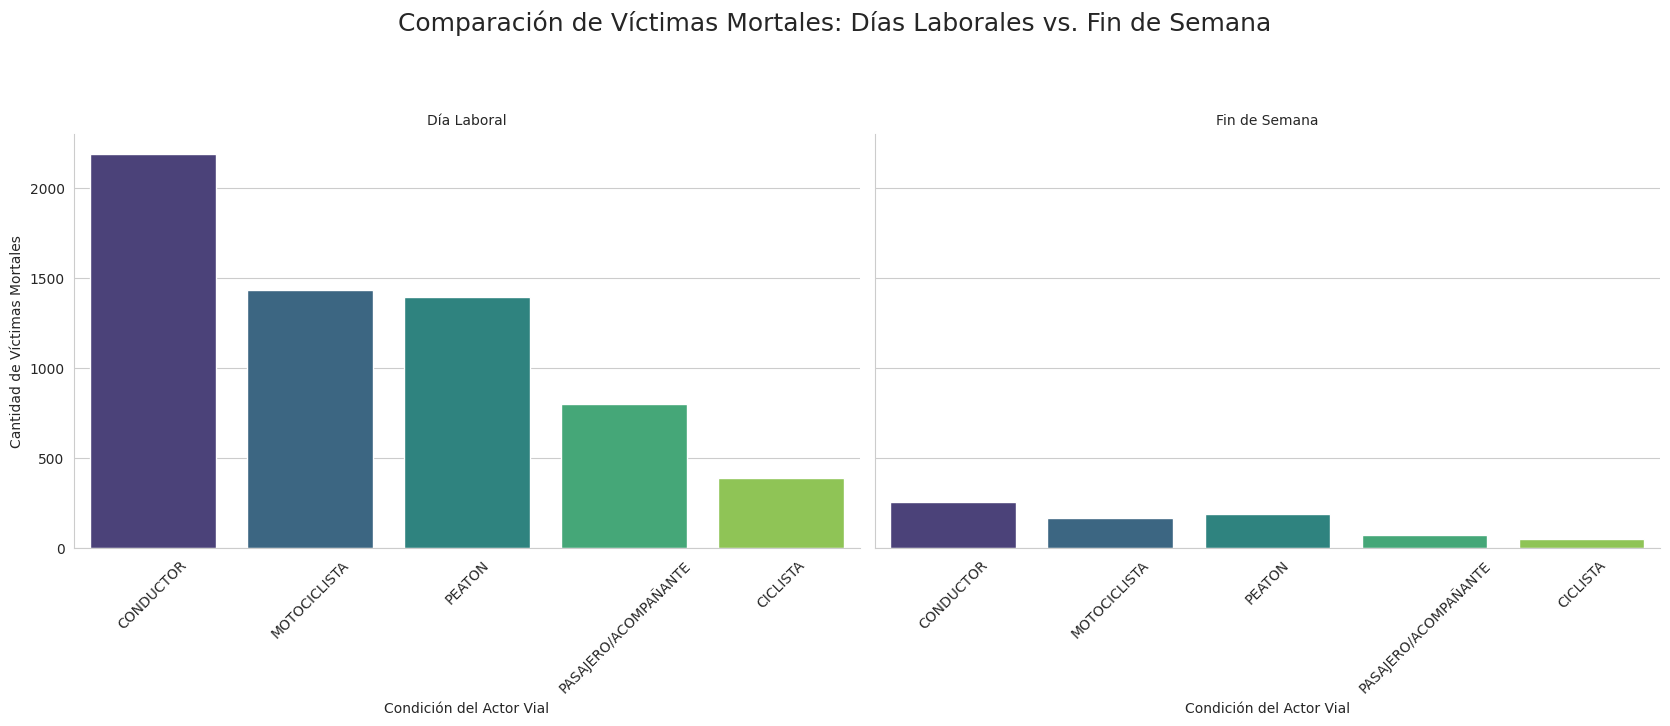

In [14]:
# 1. Ingeniería de Características: Crear columnas DIA_SEMANA y TIPO_DIA
# Aseguramos que la columna DIA_SEMANA exista en df_final
dias_mapa = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_final['DIA_SEMANA'] = df_final['FECHA_HORA'].dt.dayofweek.map(dias_mapa)

# Creamos la columna TIPO_DIA
df_final['TIPO_DIA'] = df_final['DIA_SEMANA'].apply(lambda x: 'Fin de Semana' if x in ['Sábado', 'Domingo'] else 'Día Laboral')

# Convertimos a tipo category para un mejor manejo por parte de seaborn
df_final['TIPO_DIA'] = df_final['TIPO_DIA'].astype('category')
print("--- Columnas DIA_SEMANA y TIPO_DIA creadas. ---")


# 2. Filtrar solo por siniestros con fatalidades
df_final_muertos = df_final[df_final['GRAVEDAD'] == 'Con Muertos'].copy()


# 3. Visualización comparativa con catplot
g = sns.catplot(
    data=df_final_muertos,
    x='CONDICION',
    col='TIPO_DIA',      # Crea dos gráficos, uno para cada tipo de día
    kind='count',        # Le decimos que queremos un gráfico de conteo (barras)
    height=7,
    aspect=1.2,
    palette='viridis',
    order=df_final_muertos['CONDICION'].value_counts().index # Ordenar por frecuencia general
)

# Añadir títulos y etiquetas para mayor claridad
g.fig.suptitle('Comparación de Víctimas Mortales: Días Laborales vs. Fin de Semana', y=1.03, fontsize=18)
g.set_axis_labels("Condición del Actor Vial", "Cantidad de Víctimas Mortales")
g.set_titles("{col_name}")

# Rotar etiquetas para que no se superpongan
for axes in g.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Paso 14: Conclusión del Análisis y Visualización Trivariada**

¡Lo hemos logrado! Nuestro análisis final nos presenta una comparación clara y poderosa entre los días laborales y los fines de semana.

**Análisis del Gráfico Comparativo:**

*   **Días Laborales:** El gráfico de la izquierda confirma nuestras sospechas. La siniestralidad mortal está dominada por los actores viales relacionados con el transporte diario y laboral. Los **conductores, motociclistas y peatones** lideran las cifras, reflejando el intenso movimiento de la ciudad durante la semana.
*   **Fin de Semana:** El gráfico de la derecha cuenta una historia diferente. Si bien el número absoluto de fatalidades disminuye drásticamente, la distribución cambia. Proporcionalmente, los **conductores** siguen siendo el grupo más afectado, pero la diferencia con los motociclistas y peatones no es tan abrumadora. Esto sugiere que los siniestros del fin de semana pueden estar más ligados a actividades recreativas o de ocio que a los traslados laborales.

Hemos pasado de datos crudos y desordenados a insights accionables. Sabemos quiénes son los más vulnerables (motociclistas y peatones), cuándo corren más riesgo (horas pico y noches) y cómo este riesgo cambia entre la semana y el fin de semana.

**Análisis Final: El Factor Género**

Como analistas, nuestra curiosidad no tiene fin. Hemos explorado el *qué*, *cuándo* y *quién*. Para nuestro último análisis, añadiremos una tercera dimensión a nuestra pregunta más importante: **el género**.

**Pregunta Final de Negocio: Para cada nivel de gravedad (Daños, Heridos, Muertos), ¿cómo se distribuyen las víctimas por su condición Y su género?**

Esta pregunta es más compleja y requiere una visualización que maneje tres variables a la vez: **Gravedad, Condición y Sexo**. Un `catplot` con facetas (subgráficos) es la herramienta perfecta para desglosar esta información de manera clara.

**Instrucción:** Pídele al asistente que genere una visualización trivariada que nos permita responder a esta pregunta final.

### Prompt para el Asistente de IA:
> Este es el análisis final. Quiero crear una visualización avanzada que me permita entender la relación entre tres variables categóricas de mi DataFrame `df_final`: `GRAVEDAD`, `CONDICionado y `SEXO`.
>
> Por favor, genera el código de Python para hacer lo siguiente:
>
> 1.  Utiliza la función `sns.catplot` de Seaborn.
> 2.  Las **columnas** de la cuadrícula de gráficos (`col`) deben representar la `GRAVEDAD` del siniestro.
> 3.  Dentro de cada gráfico de la cuadrícula, el eje X debe ser la `CONDICION` del actor vial.
> 4.  Las barras dentro de cada gráfico deben estar agrupadas por `SEXO` (usando el parámetro `hue`).
> 5.  El tipo de gráfico (`kind`) debe ser `'count'`.
> 6.  Añade un título general a la figura y asegúrate de que las etiquetas sean claras y legibles, rotando las del eje X si es necesario.

In [15]:
# --- Visualización Trivariada Final ---
print("--- Generando análisis final: Víctimas por Gravedad, Condición y Género ---")

# Para este gráfico, usamos el df_final que ya tiene todas las columnas necesarias.
# Filtramos condiciones con muy pocos datos para una mejor visualización.
condiciones_comunes = df_final['CONDICION'].value_counts().nlargest(5).index
df_grafico_final = df_final[df_final['CONDICION'].isin(condiciones_comunes)]


g = sns.catplot(
    data=df_grafico_final,
    x='CONDICION',
    hue='SEXO',
    col='GRAVEDAD',      # Variable para las columnas de la cuadrícula
    kind='count',        # Gráfico de conteo
    height=7,
    aspect=1.1,
    palette='Set2',
    col_order=['Solo Daños', 'Con Heridos', 'Con Muertos'], # Orden lógico
    order=condiciones_comunes # Ordenar por frecuencia
)

# Añadir títulos y etiquetas para máxima claridad
g.fig.suptitle('Análisis de Involucrados por Gravedad, Condición y Género', y=1.03, fontsize=18)
g.set_axis_labels("Condición del Actor Vial", "Cantidad de Personas Involucradas")
g.set_titles("Gravedad: {col_name}")
g.legend.set_title("Género")

# Rotar etiquetas para que no se superpongan
for axes in g.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- ¡Análisis Exploratorio de Datos completado! ---")

--- Generando análisis final: Víctimas por Gravedad, Condición y Género ---


ValueError: Could not interpret value `SEXO` for `hue`. An entry with this name does not appear in `data`.

### **Paso 15: Depuración Final y el Bloque de Código Definitivo para Análisis**

Nuestro último intento arrojó un `ValueError`, indicando que la columna `SEXO` no se encontró en los datos que pasamos al gráfico. Este error es la pieza final del rompecabezas de depuración y nos enseña una lección fundamental sobre la selección de datos.

**Análisis de la Causa Raíz:**

Al revisar el código del **Paso 12**, identificamos la línea clave del problema:
```python
# Seleccionar solo las columnas que necesitamos para el análisis final
columnas_finales = ['FECHA_HORA', 'HORA_DEL_DIA', 'GRAVEDAD', 'CONDICION']
df_final = df_completo[columnas_finales].copy()
```
Cuando creamos nuestro DataFrame `df_final`, fuimos muy específicos sobre las columnas que queríamos conservar. En ese momento, solo incluimos las necesarias para el gráfico de líneas. Sin embargo, nuestro siguiente análisis (el `catplot` trivariado) requería una columna adicional, `SEXO`, que habíamos descartado en este paso.

**La Solución: Un Bloque de Análisis Integrado**

Hemos aprendido que el orden de las operaciones y la selección de datos son cruciales. Para concluir la clase y asegurar que todo nuestro análisis sea reproducible, crearemos un **único bloque de código final**. Este bloque comenzará desde la recarga de los datos crudos y ejecutará toda la secuencia de procesamiento y visualización de forma correcta, asegurándose de que todas las columnas necesarias estén disponibles en cada paso.

Este bloque representará el flujo de trabajo completo y consolidado de nuestra Clase 2.

**Instrucción:** Pídele al asistente que genere este bloque de código final e integrado.


### Prompt para el Asistente de IA:
> Hemos llegado a la causa raíz de todos los errores. El problema es que hemos ido modificando nuestros DataFrames y perdiendo columnas necesarias para análisis posteriores.
>
> Por favor, genera un **único bloque de código maestro y definitivo** que realice todo el análisis de la Clase 2 de forma autocontenida y en el orden correcto. Este bloque debe:
>
> 1.  **Recargar** los datos crudos de las hojas 'SINIESTROS' y 'ACTOR_VIAL'.
> 2.  **Fusionar** los dos DataFrames crudos en `df_completo`.
> 3.  **Realizar la Ingeniería de Características** creando las columnas `FECHA_HORA`, `HORA_DEL_DIA`, `DIA_SEMANA` y `TIPO_DIA`.
> 4.  **Limpiar y Mapear** las columnas `GRAVEDAD`, `CONDICION` y `SEXO` a texto y tipo `category`.
> 5.  **Crear el DataFrame `df_final`**, esta vez asegurándote de incluir todas las columnas necesarias para los gráficos: `HORA_DEL_DIA`, `DIA_SEMANA`, `TIPO_DIA`, `GRAVEDAD`, `CONDICION` y `SEXO`.
> 6.  **Generar las dos visualizaciones finales** que hemos trabajado:
>     - El **gráfico de líneas** comparativo de víctimas mortales (Peatones vs. Motociclistas) por hora del día.
>     - El **`catplot`** comparativo de víctimas mortales (Día Laboral vs. Fin de Semana) por condición.


--- [Paso 1]: Recargando datos crudos para un análisis limpio ---
--- [Paso 2]: Fusionando DataFrames crudos ---
--- [Paso 3]: Realizando ingeniería de características ---
--- [Paso 4]: Limpiando y mapeando columnas categóricas ---
--- [Paso 5]: Creando el DataFrame final para análisis ---

Resumen del DataFrame final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422416 entries, 0 to 422415
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   HORA_DEL_DIA  165068 non-null  float64 
 1   DIA_SEMANA    165068 non-null  category
 2   TIPO_DIA      422416 non-null  category
 3   GRAVEDAD      422416 non-null  category
 4   CONDICION     422416 non-null  category
 5   SEXO          422416 non-null  category
dtypes: category(5), float64(1)
memory usage: 5.2 MB

--- [Paso 6]: Generando visualizaciones de análisis ---

Generando Gráfico A: Siniestros Mortales por Hora (Peatones vs. Motociclistas)...


/tmp/ipython-input-2536090765.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')


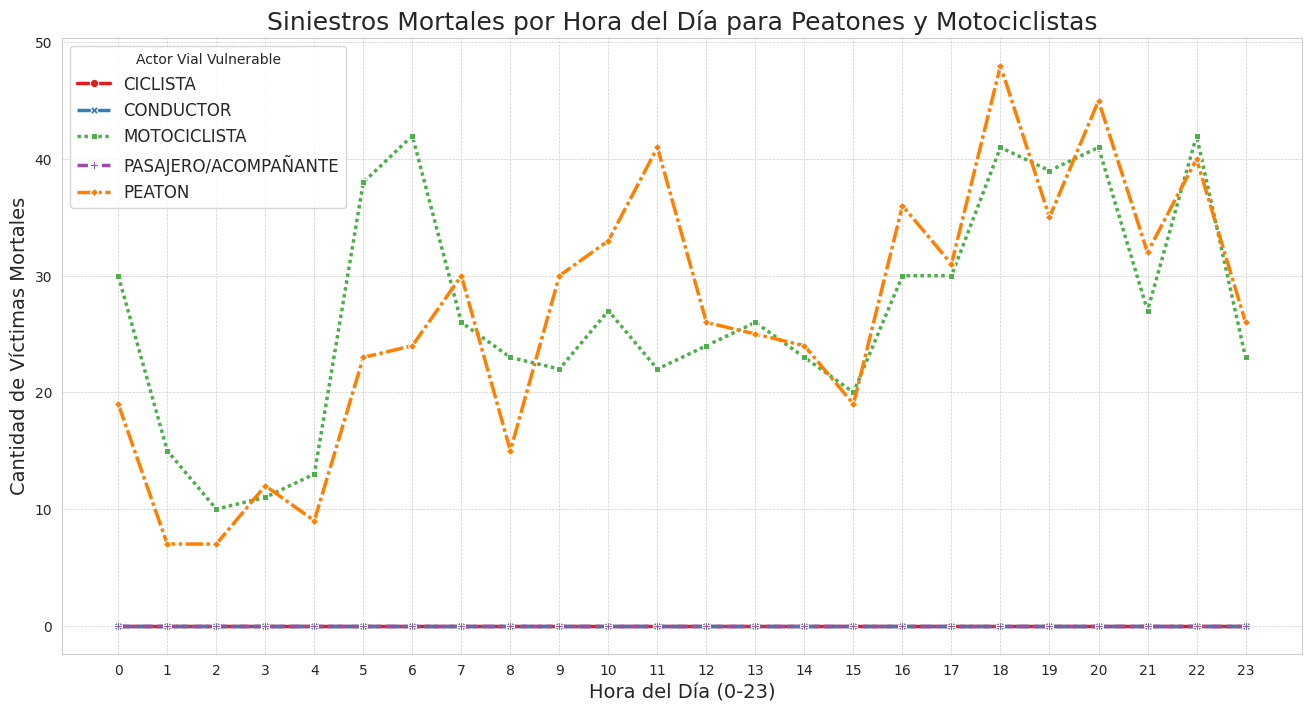


Generando Gráfico B: Comparación de Víctimas Mortales (Días Laborales vs. Fin de Semana)...


/tmp/ipython-input-2536090765.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


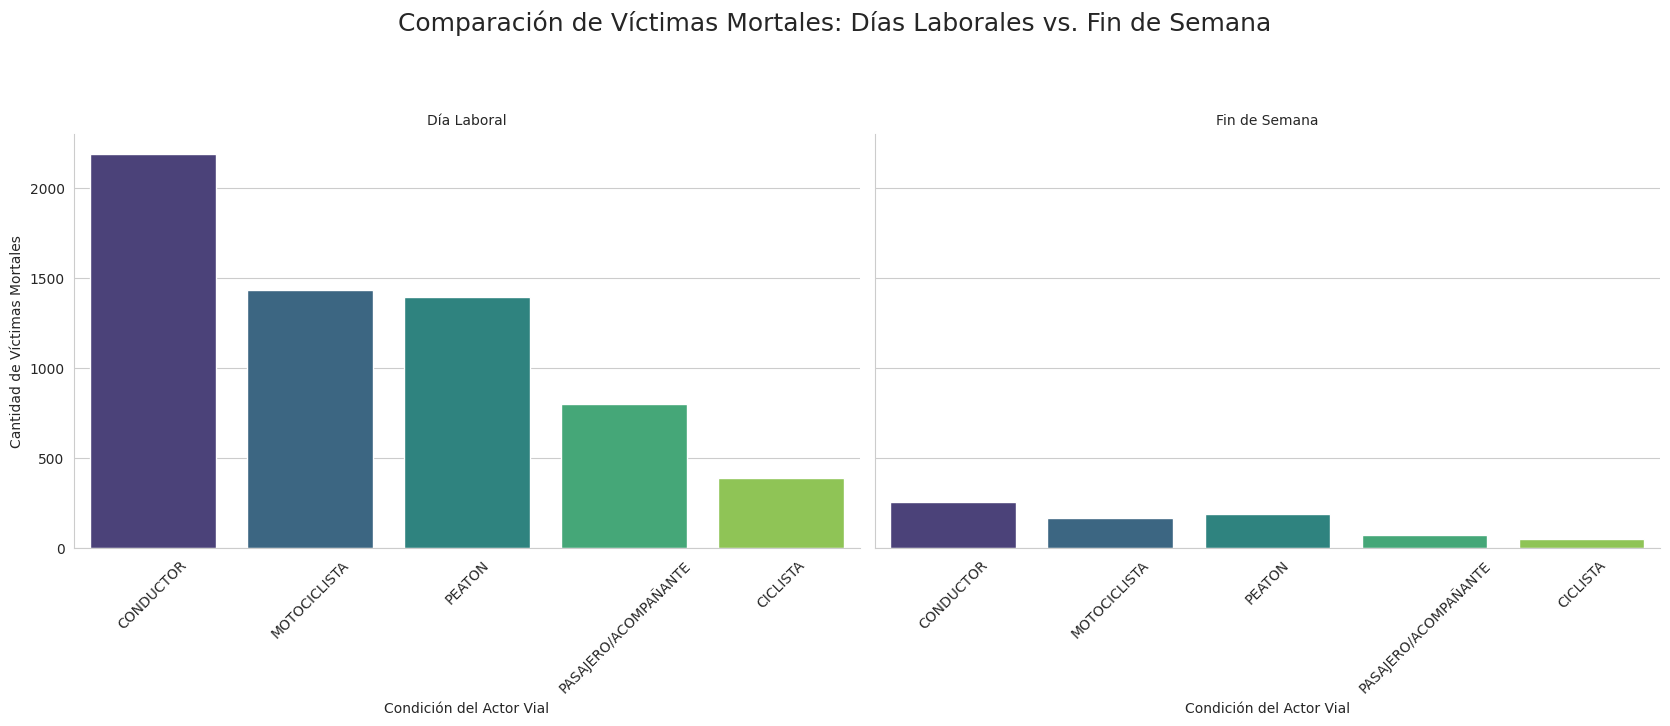


--- ¡Análisis Exploratorio de Datos de la Clase 2 completado! ---


In [16]:
# --- Bloque de Código Maestro y Definitivo para la Clase 2 ---

# 1. Recarga de Datos Crudos (Garantiza un inicio limpio)
print("--- [Paso 1]: Recargando datos crudos para un análisis limpio ---")
df_siniestros_raw = pd.read_excel(file_path, sheet_name='SINIESTROS')
df_actores_raw = pd.read_excel(file_path, sheet_name='ACTOR_VIAL')
df_diccionario_raw = pd.read_excel(file_path, sheet_name='DICCIONARIO')

# 2. Fusión de los Datos Originales
print("--- [Paso 2]: Fusionando DataFrames crudos ---")
df_completo = pd.merge(df_siniestros_raw, df_actores_raw, on='CODIGO_ACCIDENTE', how='inner')

# 3. Ingeniería de Características
print("--- [Paso 3]: Realizando ingeniería de características ---")
df_completo['FECHA_HORA'] = pd.to_datetime(df_completo['FECHA_x'].astype(str) + ' ' + df_completo['HORA'].astype(str), errors='coerce')
df_completo['HORA_DEL_DIA'] = df_completo['FECHA_HORA'].dt.hour
dias_mapa = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_completo['DIA_SEMANA'] = df_completo['FECHA_HORA'].dt.dayofweek.map(dias_mapa)
df_completo['TIPO_DIA'] = df_completo['DIA_SEMANA'].apply(lambda x: 'Fin de Semana' if x in ['Sábado', 'Domingo'] else 'Día Laboral')

# 4. Limpieza y Mapeo
print("--- [Paso 4]: Limpiando y mapeando columnas categóricas ---")
mapa_gravedad = df_diccionario_raw[df_diccionario_raw['CAMPO'] == 'GRAVEDAD'].set_index('CODIGO')['DESCRIPCION'].to_dict()
df_completo['GRAVEDAD'] = df_completo['GRAVEDAD'].map(mapa_gravedad)

# 5. Creación del DataFrame Final de Análisis
print("--- [Paso 5]: Creando el DataFrame final para análisis ---")
columnas_de_analisis = [
    'HORA_DEL_DIA', 'DIA_SEMANA', 'TIPO_DIA',
    'GRAVEDAD', 'CONDICION', 'SEXO'
]
df_final = df_completo[columnas_de_analisis].copy()

# Convertir todas las columnas de texto a tipo 'category' para optimización
for col in ['DIA_SEMANA', 'TIPO_DIA', 'GRAVEDAD', 'CONDICION', 'SEXO']:
    df_final[col] = df_final[col].astype('category')

print("\nResumen del DataFrame final:")
df_final.info()


# --- 6. Generación de Visualizaciones Finales ---
print("\n--- [Paso 6]: Generando visualizaciones de análisis ---")

# Gráfico A: Líneas comparativas de víctimas mortales por hora
print("\nGenerando Gráfico A: Siniestros Mortales por Hora (Peatones vs. Motociclistas)...")
df_vulnerables_muertos = df_final[
    (df_final['GRAVEDAD'] == 'Con Muertos') &
    (df_final['CONDICION'].isin(['PEATON', 'MOTOCICLISTA']))
].copy()
datos_lineplot = df_vulnerables_muertos.groupby(['HORA_DEL_DIA', 'CONDICION']).size().reset_index(name='CANTIDAD')

plt.figure(figsize=(16, 8))
ax1 = sns.lineplot(data=datos_lineplot, x='HORA_DEL_DIA', y='CANTIDAD', hue='CONDICION', style='CONDICION', markers=True, linewidth=2.5, palette='Set1')
ax1.set_title('Siniestros Mortales por Hora del Día para Peatones y Motociclistas', fontsize=18)
ax1.set_xlabel('Hora del Día (0-23)', fontsize=14)
ax1.set_ylabel('Cantidad de Víctimas Mortales', fontsize=14)
ax1.legend(title='Actor Vial Vulnerable', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 24))
plt.show()

# Gráfico B: Barras comparativas por tipo de día
print("\nGenerando Gráfico B: Comparación de Víctimas Mortales (Días Laborales vs. Fin de Semana)...")
df_final_muertos = df_final[df_final['GRAVEDAD'] == 'Con Muertos'].copy()

g = sns.catplot(
    data=df_final_muertos,
    x='CONDICION',
    col='TIPO_DIA',
    kind='count',
    height=7,
    aspect=1.2,
    palette='viridis',
    order=df_final_muertos['CONDICION'].value_counts().index
)
g.fig.suptitle('Comparación de Víctimas Mortales: Días Laborales vs. Fin de Semana', y=1.03, fontsize=18)
g.set_axis_labels("Condición del Actor Vial", "Cantidad de Víctimas Mortales")
g.set_titles("{col_name}")
for axes in g.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- ¡Análisis Exploratorio de Datos de la Clase 2 completado! ---")


### **Paso Final: Conclusiones y Análisis Trivariado (Gravedad, Condición y Género)**

¡Lo hemos logrado! Con un bloque de código robusto, hemos superado los errores y generado las visualizaciones clave que nos permiten responder preguntas complejas.

**Resumen de Hallazgos Clave:**

1.  **Patrones Horarios de Riesgo (Gráfico de Líneas):** Hemos confirmado que los motociclistas y peatones tienen patrones de riesgo distintos. Los **motociclistas** enfrentan un peligro extremo en la hora pico de la mañana (6 a.m.) y mantienen un riesgo alto hasta bien entrada la noche (10 p.m.). Por otro lado, el momento más letal para los **peatones** se concentra en la tarde-noche (5 p.m. a 8 p.m.).
2.  **Riesgo Laboral vs. Fin de Semana (Gráfico de Barras):** Vimos que, aunque la cantidad absoluta de fatalidades disminuye el fin de semana, la composición del riesgo cambia. El patrón de los días laborales está fuertemente ligado a los desplazamientos cotidianos, mientras que el del fin de semana podría estar más asociado a actividades recreativas.

Con estos insights en mano, podemos realizar un último análisis para añadir una capa más de profundidad. Hasta ahora, hemos visto el *qué*, *cuándo* y *quién*. Ahora exploraremos si el **género** juega un papel en la distribución de las víctimas.

**Pregunta Final de Negocio: Para cada nivel de gravedad (Daños, Heridos, Muertos), ¿cómo se distribuyen las personas involucradas por su condición Y su género?**

Esta pregunta nos permitirá identificar si existen diferencias de género dentro de cada grupo de actores viales y en cada nivel de severidad del accidente. Para ello, usaremos nuestra visualización más avanzada: un `catplot` con facetas que mostrará la relación entre estas tres variables.

**Instrucción:** Pídele al asistente que genere la visualización trivariada final.


### Prompt para el Asistente de IA:
> Hemos completado los análisis bivariados. Para el análisis final, quiero crear una visualización avanzada que me permita entender la relación entre tres variables categóricas de nuestro DataFrame `df_final`: `GRAVEDAD`, `CONDICION` y `SEXO`.
>
> Por favor, genera el código de Python para hacer lo siguiente:
>
> 1.  Utiliza la función `sns.catplot` de Seaborn.
> 2.  Las **columnas** de la cuadrícula de gráficos (`col`) deben representar la `GRAVEDAD` del siniestro.
> 3.  Dentro de cada gráfico de la cuadrícula, el eje X debe ser la `CONDICION` del actor vial.
> 4.  Las barras dentro de cada gráfico deben estar agrupadas por `SEXO` (usando el parámetro `hue`).
> 5.  El tipo de gráfico (`kind`) debe ser `'count'`.
> 6.  Añade un título general a la figura y asegúrate de que las etiquetas sean claras y legibles, rotando las del eje X si es necesario.

--- Generando análisis final: Involucrados por Gravedad, Condición y Género ---


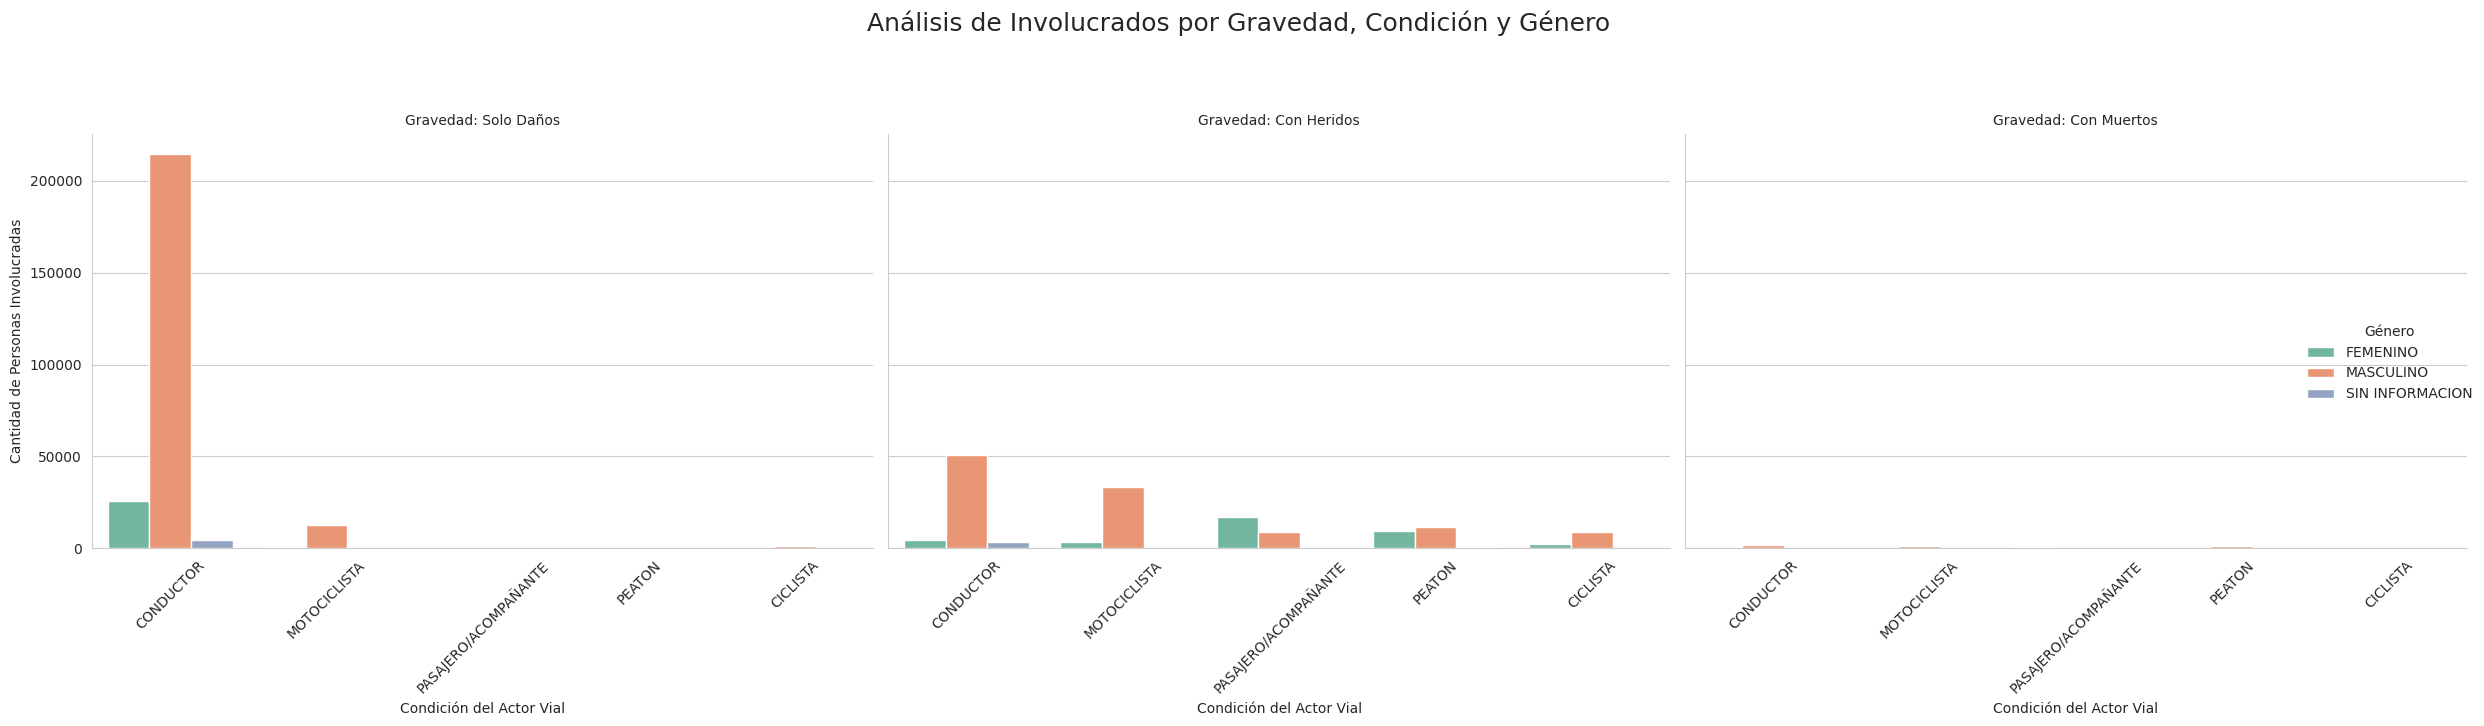


--- ¡Análisis Exploratorio de Datos de la Clase 2 completado! ---


In [17]:
# --- Análisis Trivariado Final: Gravedad, Condición y Género ---

print("--- Generando análisis final: Involucrados por Gravedad, Condición y Género ---")

# Para una mejor visualización, nos enfocaremos en las 5 condiciones más frecuentes.
condiciones_comunes = df_final['CONDICION'].value_counts().nlargest(5).index
df_grafico_final = df_final[df_final['CONDICION'].isin(condiciones_comunes)]


g = sns.catplot(
    data=df_grafico_final,
    x='CONDICION',
    hue='SEXO',
    col='GRAVEDAD',      # Variable para las columnas de la cuadrícula
    kind='count',        # Gráfico de conteo
    height=7,
    aspect=1.1,
    palette='Set2',
    col_order=['Solo Daños', 'Con Heridos', 'Con Muertos'], # Orden lógico
    order=condiciones_comunes # Ordenar por frecuencia
)

# Añadir títulos y etiquetas para máxima claridad
g.fig.suptitle('Análisis de Involucrados por Gravedad, Condición y Género', y=1.03, fontsize=18)
g.set_axis_labels("Condición del Actor Vial", "Cantidad de Personas Involucradas")
g.set_titles("Gravedad: {col_name}")
g.legend.set_title("Género")

# Rotar etiquetas para que no se superpongan
for axes in g.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- ¡Análisis Exploratorio de Datos de la Clase 2 completado! ---")


### **Paso Final: Interpretación del Análisis Trivariado y Conclusión de la Clase 2**

¡Felicidades! Este último gráfico es la culminación de todo nuestro trabajo en esta clase. Al combinar tres variables (`GRAVEDAD`, `CONDICION` y `SEXO`), hemos descubierto patrones profundos que no eran visibles antes.

**Análisis del Gráfico Final:**

1.  **Gravedad: Solo Daños:**
    *   Este gráfico está completamente dominado por los **conductores**, y dentro de este grupo, la mayoría son **masculinos**. Esto es lógico: la categoría más grande de siniestros son choques entre vehículos donde los ocupantes salen ilesos, y la mayoría de los conductores en el dataset son hombres.

2.  **Gravedad: Con Heridos:**
    *   Aquí la historia cambia. Aunque los **conductores masculinos** siguen siendo el grupo más grande, los **motociclistas masculinos** se convierten en el segundo grupo más afectado, con cifras muy significativas.
    *   Además, la participación de las mujeres aumenta en todas las categorías, especialmente como **pasajeras/acompañantes** y **peatones**, resaltando su vulnerabilidad a sufrir heridas.

3.  **Gravedad: Con Muertos:**
    *   Este es el gráfico más impactante y confirma nuestros hallazgos anteriores con una nueva dimensión. Las fatalidades de conductores son relativamente bajas.
    *   Las víctimas mortales se concentran abrumadoramente en **motociclistas** y **peatones**.
    *   El hallazgo más contundente es la **enorme disparidad de género**: en estas categorías de alta vulnerabilidad, la gran mayoría de las víctimas mortales son **hombres**.

**Conclusión y Resumen de la Clase 2**

En esta sesión, hemos hecho la transición de ser simples "cargadores de datos" a ser verdaderos "analistas". Hemos utilizado a la IA no solo para escribir código, sino como un socio para depurar, refinar y visualizar nuestras hipótesis.

Aprendimos a:
*   Identificar y solucionar errores de estado (`KeyError`) entendiendo el flujo de un notebook.
*   Combinar diferentes fuentes de datos usando `merge` para enriquecer nuestro análisis.
*   Realizar ingeniería de características (`HORA_DEL_DIA`, `TIPO_DIA`) para responder preguntas más específicas.
*   Construir visualizaciones cada vez más complejas (líneas, mapas de calor, facetas) para descubrir patrones profundos.
*   Interpretar los gráficos para extraer conclusiones accionables sobre la seguridad vial en Bogotá.

Hemos dominado el arte de mirar hacia atrás, de analizar los datos que ya tenemos para entender lo que ha sucedido.

### **Avance de la Clase 3: De la Exploración a la Predicción con Machine Learning**

En las dos primeras clases, hemos preparado y explorado nuestros datos para entender el pasado. En la Clase 3, daremos el siguiente paso lógico y el más emocionante en la ciencia de datos: **aprenderemos a mirar hacia el futuro.**

Utilizaremos los patrones que hemos descubierto para entrenar un **modelo de Machine Learning**. El objetivo de un modelo es aprender de los datos históricos para poder hacer **predicciones** sobre datos nuevos que no ha visto antes.

Para nuestro caso, la pregunta de negocio más valiosa que un modelo podría ayudarnos a responder es:

**Pregunta Clave para la Clase 3: Dadas las circunstancias de un siniestro (la hora, el día, el tipo de actor vial, su género), ¿podemos predecir su gravedad más probable (Solo Daños, Con Heridos o Con Muertos)?**

Un modelo que pueda responder a esto tendría aplicaciones prácticas inmensas, desde ayudar a los servicios de emergencia a anticipar la severidad de un incidente hasta informar políticas públicas de seguridad vial.

En la próxima clase, aprenderemos a:
1.  **Preparar los datos para el modelado:** Convertiremos nuestras categorías en un formato numérico que los algoritmos puedan entender (One-Hot Encoding).
2.  **Dividir nuestros datos:** Separaremos el dataset en un conjunto de "entrenamiento" (para enseñar al modelo) y uno de "prueba" (para evaluarlo de forma imparcial).
3.  **Entrenar un modelo de clasificación:** Usaremos un modelo sencillo pero poderoso, como un Árbol de Decisión, para que aprenda los patrones.
4.  **Evaluar el rendimiento:** Mediremos qué tan bueno es nuestro modelo para predecir la gravedad y entenderemos dónde acierta y dónde falla.

¡Prepárense para dar el salto del análisis a la inteligencia artificial predictiva!